# **Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

# **Full Forms**

In [ ]:
att_path = '/content/drive/My Drive/Colab Notebooks/attribute-details.csv'
att_df = pd.read_csv(att_path)

In [ ]:
print('Columns:', att_df.columns)
print('Dimension:', att_df.shape)

Columns: Index(['No', 'Category', 'Code', 'Short name', 'Full name', 'Description'], dtype='object')
Dimension: (47, 6)


In [ ]:
from google.colab import data_table

data_table.DataTable(att_df[att_df.columns[2:]], include_index=False, num_rows_per_page=50)

#**Data Overview & Preprocessing**

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/class_level_quality_code_smell_mdi.csv'
df = pd.read_csv(path)

In [ ]:
pd.set_option('display.max_columns', 55)

df.head()

Unnamed: 0                            QualifiedName               Name  \
0           0                                   junit5                NaN   
1           2           org.junit.jupiter.api.AfterAll           AfterAll   
2           3          org.junit.jupiter.api.AfterEach          AfterEach   
3           4          org.junit.jupiter.api.AssertAll          AssertAll   
4          12  org.junit.jupiter.api.AssertArrayEquals  AssertArrayEquals   

  Complexity Coupling        Size Lack of Cohesion  CBO    RFC  SRFC  DIT  \
0        NaN      NaN         NaN              NaN  NaN    NaN   NaN  NaN   
1        low      low         low              low  0.0    0.0   0.0  1.0   
2        low      low         low              low  0.0    0.0   0.0  1.0   
3        low      low         low              low  3.0   23.0  12.0  1.0   
4       high      low  low-medium      medium-high  2.0  113.0  44.0  1.0   

   NOC    WMC    LOC  CMLOC  NOF  NOSF  NOM  NOSM  NORM  LCOM   LCAM  LTCC  \
0  NaN    NaN    NaN    NaN  NaN   NaN  NaN   NaN   NaN   NaN    NaN   NaN   
1  0.0    0.0    5.0    0.0  0.0   0.0  0.0   0.0   0.0   0.0  0.000   0.0   
2  0.0    0.0    5.0    0.0  0.0   0.0  0.0   0.0   0.0   0.0  0.000   0.0   
3  0.0    9.0   30.0   29.0  0.0   0.0  1.0   6.0   0.0   0.0  0.543   0.0   
4  0.0  112.0  227.0  226.0  0.0   0.0  1.0  51.0   0.0   0.0  0.766   0.0   

   ATFD   SI  Coverage  #(C&I)  #C  #I  LOC.1  AC  EC  Abs  Ins  ND  WMC.1  \
0   NaN  NaN       NaN     NaN NaN NaN    NaN NaN NaN  NaN  NaN NaN    NaN   
1   0.0  0.0       NaN     NaN NaN NaN    5.0 NaN NaN  NaN  NaN NaN    0.0   
2   0.0  0.0       NaN     NaN NaN NaN    5.0 NaN NaN  NaN  NaN NaN    0.0   
3   0.0  0.0       NaN     NaN NaN NaN   30.0 NaN NaN  NaN  NaN NaN    9.0   
4   0.0  0.0       NaN     NaN NaN NaN  227.0 NaN NaN  NaN  NaN NaN  112.0   

   Coverage.1  MCC  NBD  LOC.2  #Pa  #MC  #AF          filename  GodClass  \
0         NaN  NaN  NaN    NaN  NaN  NaN  NaN  2 junit-5-2018-1         0   
1         NaN  NaN  NaN    NaN  NaN  NaN  NaN  2 junit-5-2018-1         1   
2         NaN  NaN  NaN    NaN  NaN  NaN  NaN  2 junit-5-2018-1         0   
3         NaN  NaN  NaN    NaN  NaN  NaN  NaN  2 junit-5-2018-1         1   
4         NaN  NaN  NaN    NaN  NaN  NaN  NaN  2 junit-5-2018-1         1   

   ExcessiveMethodLength  DataClass  ExcessiveParameterList    ps_LOC  \
0                      0          0                       0  1.000000   
1                      0          0                       0  0.005682   
2                      0          0                       0  0.034091   
3                      0          0                       0  0.250000   
4                      0          1                       0  0.011364   

     ps_WMC  ps_ATFD  ps_LTCC    ps_NOM  mdi_godclass  
0  1.000000      1.0      1.0  1.000000      1.000000  
1  0.000000      0.0      0.0  0.000000      0.001136  
2  0.042553      0.0      0.0  0.111111      0.037551  
3  0.000000      0.0      0.0  0.000000      0.050000  
4  0.021277      0.0      0.0  0.055556      0.017639

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['QualifiedName', 'Name', 'Complexity', 'Coupling', 'Size',
       'Lack of Cohesion', 'CBO', 'RFC', 'SRFC', 'DIT', 'NOC', 'WMC', 'LOC',
       'CMLOC', 'NOF', 'NOSF', 'NOM', 'NOSM', 'NORM', 'LCOM', 'LCAM', 'LTCC',
       'ATFD', 'SI', 'Coverage', '#(C&I)', '#C', '#I', 'LOC.1', 'AC', 'EC',
       'Abs', 'Ins', 'ND', 'WMC.1', 'Coverage.1', 'MCC', 'NBD', 'LOC.2', '#Pa',
       '#MC', '#AF', 'filename', 'GodClass', 'ExcessiveMethodLength',
       'DataClass', 'ExcessiveParameterList', 'ps_LOC', 'ps_WMC', 'ps_ATFD',
       'ps_LTCC', 'ps_NOM', 'mdi_godclass'],
      dtype='object')

In [ ]:
df.shape

(190707, 53)

In [ ]:
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 0]

Name                  0.034608
Complexity            0.031462
Coupling              0.031462
Size                  0.031462
Lack of Cohesion      0.031462
CBO                   0.031462
RFC                   0.031462
SRFC                  0.031462
DIT                   0.031462
NOC                   0.031462
WMC                   0.031462
LOC                   0.031462
CMLOC                 0.031462
NOF                   0.031462
NOSF                  0.031462
NOM                   0.031462
NOSM                  0.031462
NORM                  0.565789
LCOM                  0.031462
LCAM                  0.031462
LTCC                  0.031462
ATFD                  0.031462
SI                    0.031462
Coverage            100.000000
#(C&I)              100.000000
#C                  100.000000
#I                  100.000000
LOC.1                 0.031462
AC                  100.000000
EC                  100.000000
Abs                 100.000000
Ins                 100.000000
ND      

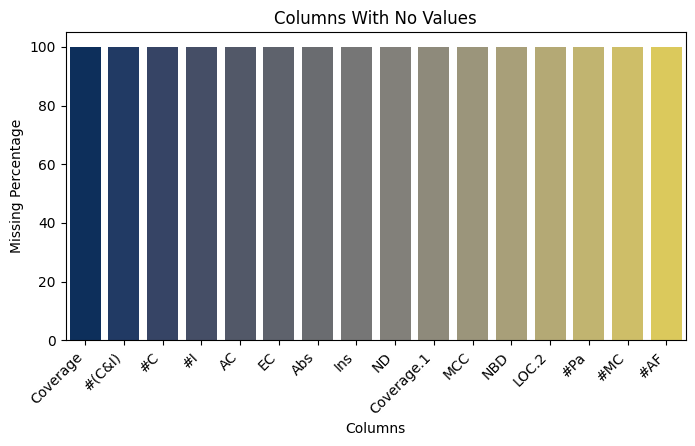

In [ ]:
missing = missing_percentage[missing_percentage > 99]

plt.figure(figsize=(8, 4))
sns.barplot(x=missing.index, y=missing.values, palette='cividis')
plt.title('Columns with no values'.title())
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
missing_cols = missing.index.tolist()
print('Missing Columns:', missing_cols)

Missing Columns: ['Coverage', '#(C&I)', '#C', '#I', 'AC', 'EC', 'Abs', 'Ins', 'ND', 'Coverage.1', 'MCC', 'NBD', 'LOC.2', '#Pa', '#MC', '#AF']


In [ ]:
df.drop(missing_cols, axis=1, inplace=True)

df.shape

(190707, 37)

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(189622, 37)

In [ ]:
df.nunique()

QualifiedName             60106
Name                      52274
Complexity                    5
Coupling                      5
Size                          5
Lack of Cohesion              5
CBO                         115
RFC                         877
SRFC                        255
DIT                          11
NOC                          97
WMC                         318
LOC                        1346
CMLOC                       785
NOF                          64
NOSF                        131
NOM                         143
NOSM                         74
NORM                         41
LCOM                        791
LCAM                        645
LTCC                        676
ATFD                         29
SI                          350
LOC.1                      1346
WMC.1                       318
filename                     60
GodClass                      2
ExcessiveMethodLength         2
DataClass                     2
ExcessiveParameterList        2
ps_LOC  

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

print('Numeric Columns:', numeric_cols)
print("Number of numeric columns: ", len(numeric_cols)-6)

Numeric Columns: ['CBO', 'RFC', 'SRFC', 'DIT', 'NOC', 'WMC', 'LOC', 'CMLOC', 'NOF', 'NOSF', 'NOM', 'NOSM', 'NORM', 'LCOM', 'LCAM', 'LTCC', 'ATFD', 'SI', 'LOC.1', 'WMC.1', 'GodClass', 'ExcessiveMethodLength', 'DataClass', 'ExcessiveParameterList', 'ps_LOC', 'ps_WMC', 'ps_ATFD', 'ps_LTCC', 'ps_NOM', 'mdi_godclass']
Number of numeric columns:  24


In [ ]:
non_numeric_cols = df.select_dtypes(exclude='number').columns.tolist()

print('Non-Numeric Columns:', non_numeric_cols)
print("Number of non numeric columns: ", len(non_numeric_cols)-3)

Non-Numeric Columns: ['QualifiedName', 'Name', 'Complexity', 'Coupling', 'Size', 'Lack of Cohesion', 'filename']
Number of non numeric columns:  4


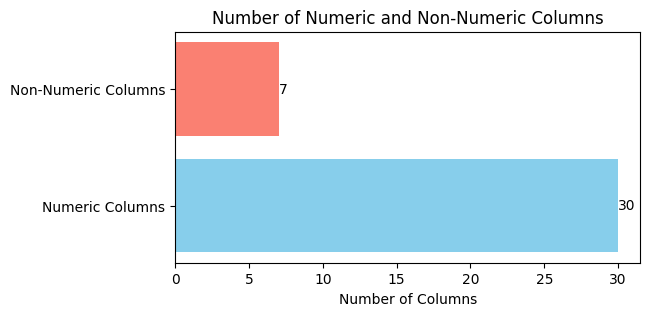

In [ ]:
plt.figure(figsize=(6, 3))
plt.barh(['Numeric Columns', 'Non-Numeric Columns'], [len(numeric_cols), len(non_numeric_cols)], color=['skyblue', 'salmon'])
plt.title('Number of Numeric and Non-Numeric Columns')
plt.xlabel('Number of Columns')

for index, value in enumerate([len(numeric_cols), len(non_numeric_cols)]):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.show()

In [ ]:
df[non_numeric_cols].head()

QualifiedName               Name  Complexity  \
1           org.junit.jupiter.api.AfterAll           AfterAll         low   
2          org.junit.jupiter.api.AfterEach          AfterEach         low   
3          org.junit.jupiter.api.AssertAll          AssertAll         low   
4  org.junit.jupiter.api.AssertArrayEquals  AssertArrayEquals        high   
5       org.junit.jupiter.api.AssertEquals       AssertEquals  low-medium   

  Coupling        Size Lack of Cohesion          filename  
1      low         low              low  2 junit-5-2018-1  
2      low         low              low  2 junit-5-2018-1  
3      low         low              low  2 junit-5-2018-1  
4      low  low-medium      medium-high  2 junit-5-2018-1  
5      low  low-medium      medium-high  2 junit-5-2018-1

In [ ]:

numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

print("Numeric Columns:", numeric_columns)
print("Non-Numeric Columns:", non_numeric_columns)

Numeric Columns: Index(['CBO', 'RFC', 'SRFC', 'DIT', 'NOC', 'WMC', 'LOC', 'CMLOC', 'NOF',
       'NOSF', 'NOM', 'NOSM', 'NORM', 'LCOM', 'LCAM', 'LTCC', 'ATFD', 'SI',
       'LOC.1', 'WMC.1', 'GodClass', 'ExcessiveMethodLength', 'DataClass',
       'ExcessiveParameterList', 'ps_LOC', 'ps_WMC', 'ps_ATFD', 'ps_LTCC',
       'ps_NOM', 'mdi_godclass'],
      dtype='object')
Non-Numeric Columns: Index(['QualifiedName', 'Name', 'Complexity', 'Coupling', 'Size',
       'Lack of Cohesion', 'filename'],
      dtype='object')


In [ ]:
columns_of_interest = ['Complexity', 'Coupling', 'Size', 'Lack of Cohesion']

for col in columns_of_interest:
    unique_values = df[col].unique()
    print(f'Unique values in {col}: {unique_values}')

Unique values in Complexity: ['low' 'high' 'low-medium' 'very-high' 'medium-high']
Unique values in Coupling: ['low' 'low-medium' 'medium-high' 'very-high' 'high']
Unique values in Size: ['low' 'low-medium' 'medium-high' 'very-high' 'high']
Unique values in Lack of Cohesion: ['low' 'medium-high' 'high' 'low-medium' 'very-high']


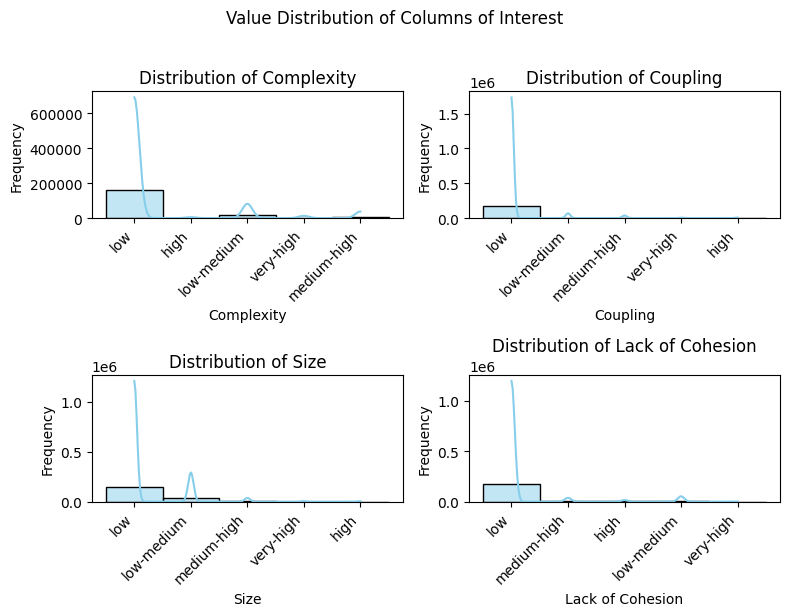

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Value Distribution of Columns of Interest', y=1.02)

axes = axes.flatten()

for i, column in enumerate(columns_of_interest):
    ax = axes[i]
    sns.histplot(df[column], ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [ ]:
label_mapping = {'low': 1, 'low-medium': 2, 'medium-high': 3, 'high': 4, 'very-high': 5}

for col in columns_of_interest:
    df[col] = df[col].map(label_mapping)

In [ ]:
cols_to_drop = ['QualifiedName', 'Name', 'filename']
df.drop(cols_to_drop, axis=1, inplace=True)

df.shape

(189622, 34)

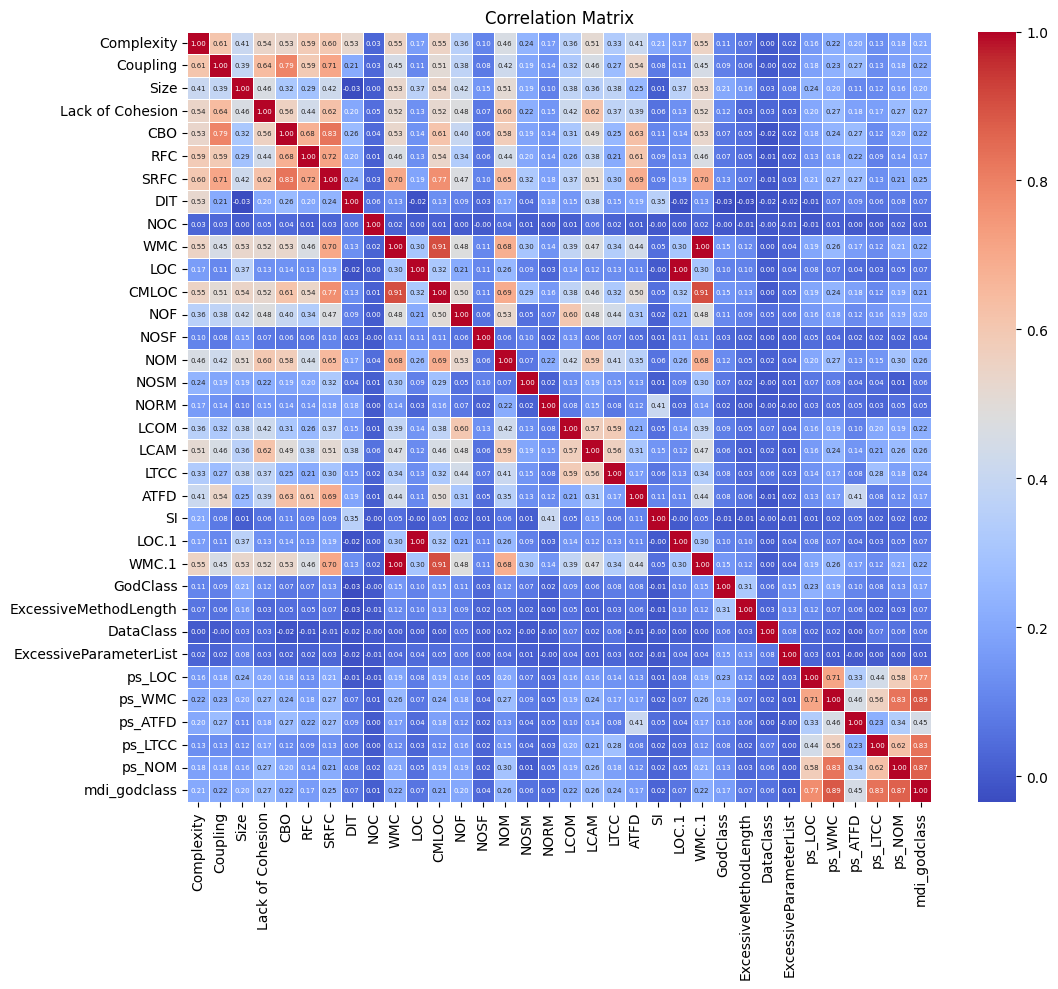

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 5})

plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(['LOC.1', 'WMC.1'], axis=1, inplace=True)

df.shape

(189622, 32)

In [ ]:
ps_cols = ['ps_LOC', 'ps_WMC', 'ps_ATFD', 'ps_LTCC', 'ps_NOM', 'mdi_godclass']
ps_df = df[ps_cols]

ps_df.head()

ps_LOC    ps_WMC  ps_ATFD  ps_LTCC    ps_NOM  mdi_godclass
1  0.005682  0.000000      0.0      0.0  0.000000      0.001136
2  0.034091  0.042553      0.0      0.0  0.111111      0.037551
3  0.250000  0.000000      0.0      0.0  0.000000      0.050000
4  0.011364  0.021277      0.0      0.0  0.055556      0.017639
5  0.017045  0.000000      0.0      0.0  0.000000      0.003409

In [ ]:
df.drop(ps_cols, axis=1, inplace=True)

df.shape

(189622, 26)

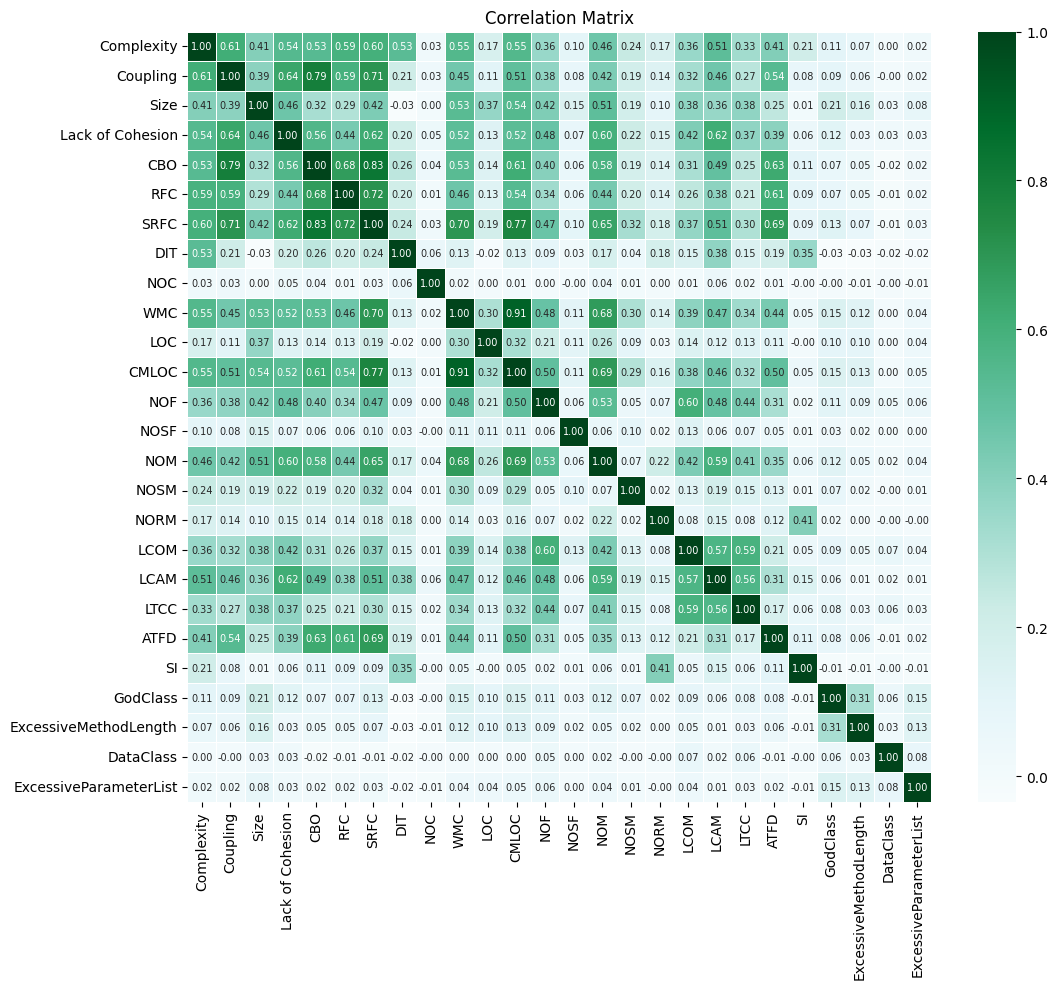

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=.5, annot_kws={"size": 7})

plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = df.corr()

high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print('Column pairs with correlation coefficient > 0.6:')
for pair in high_correlation_pairs:
    print(pair)

print('Total pairs:', len(high_correlation_pairs))

Column pairs with correlation coefficient > 0.6:
('Complexity', 'Coupling')
('Coupling', 'Lack of Cohesion')
('Coupling', 'CBO')
('Coupling', 'SRFC')
('Lack of Cohesion', 'SRFC')
('Lack of Cohesion', 'LCAM')
('CBO', 'RFC')
('CBO', 'SRFC')
('CBO', 'CMLOC')
('CBO', 'ATFD')
('RFC', 'SRFC')
('RFC', 'ATFD')
('SRFC', 'WMC')
('SRFC', 'CMLOC')
('SRFC', 'NOM')
('SRFC', 'ATFD')
('WMC', 'CMLOC')
('WMC', 'NOM')
('CMLOC', 'NOM')
('NOF', 'LCOM')
Total pairs: 20


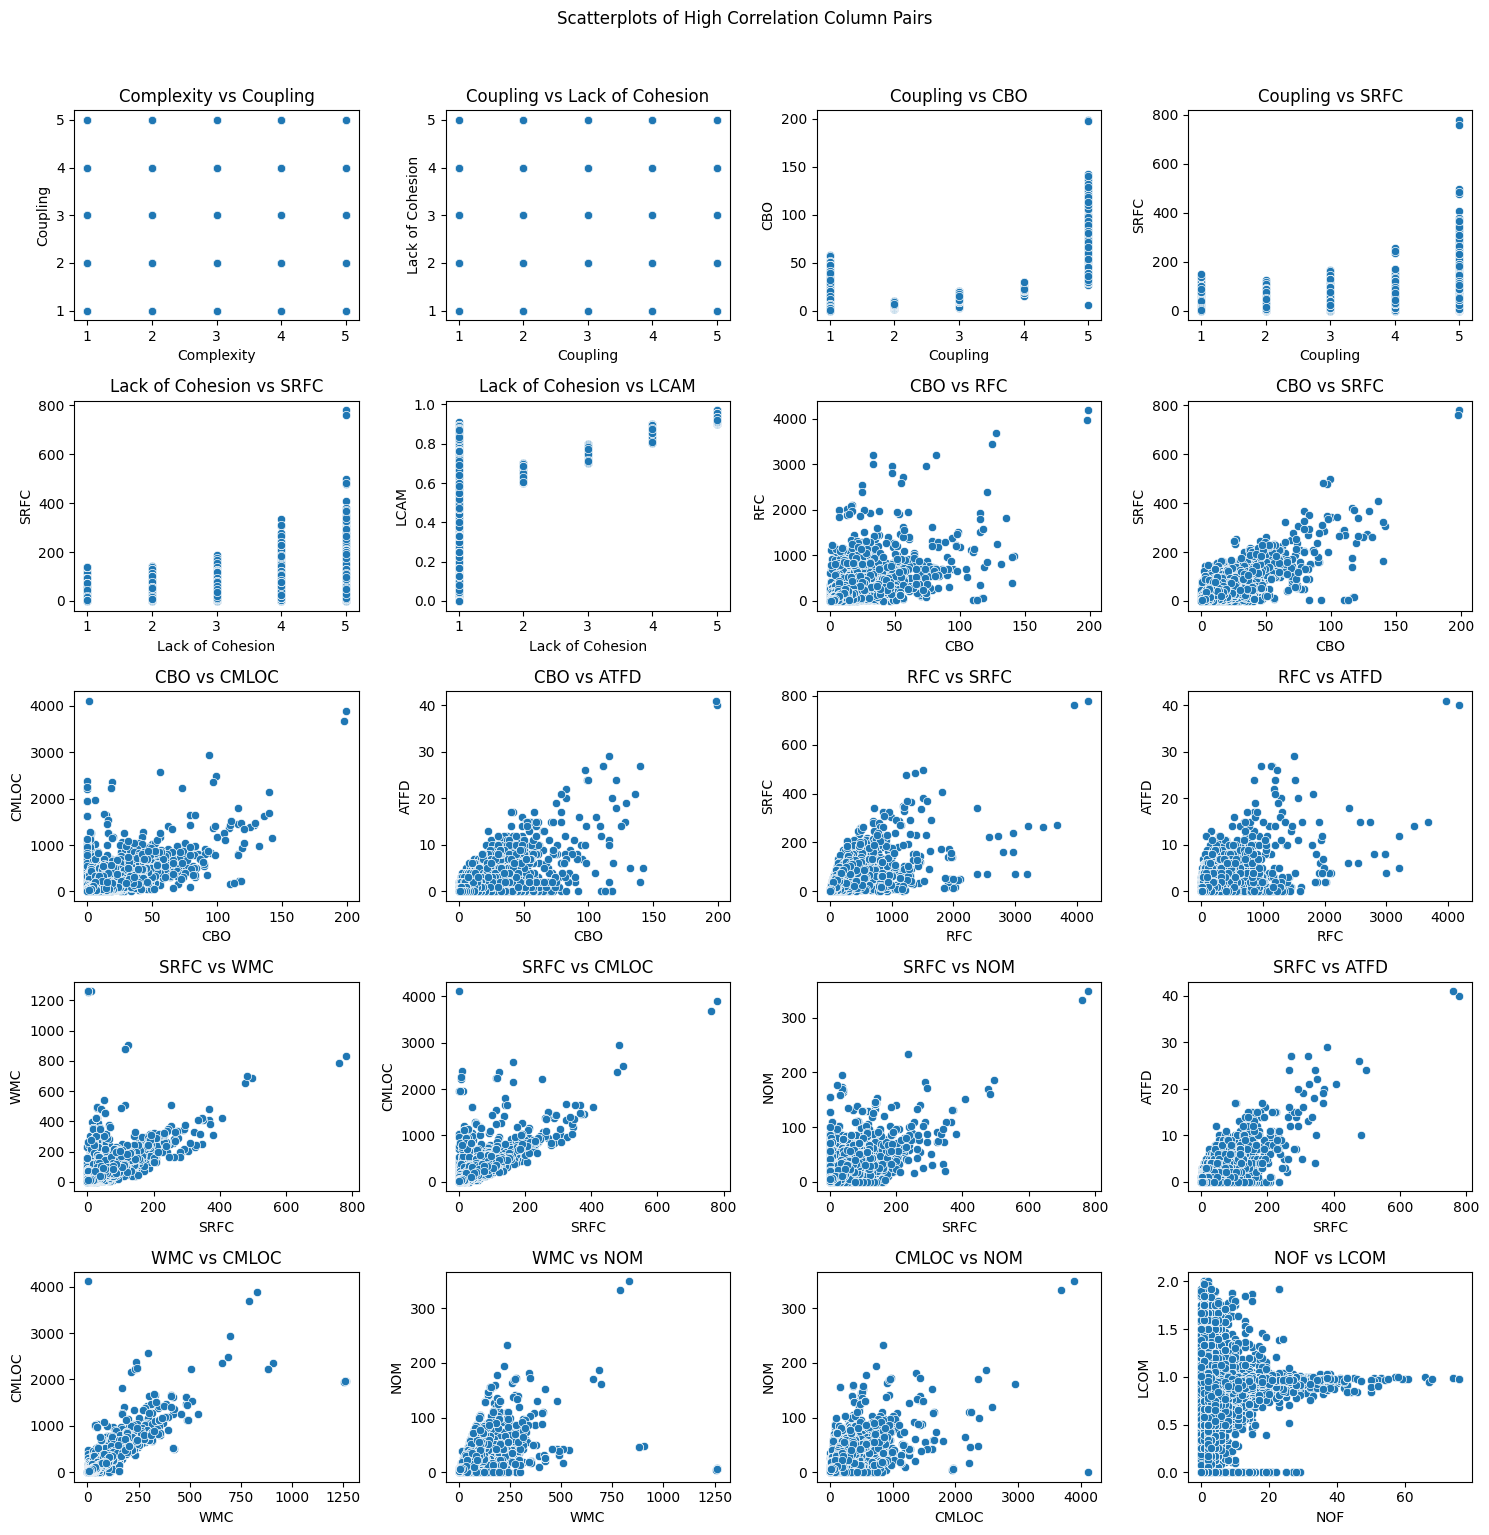

In [ ]:
num_plots = len(high_correlation_pairs)
num_rows = (num_plots + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))
fig.suptitle('Scatterplots of High Correlation Column Pairs', y=1.02)

axes = axes.flatten()

for i, pair in enumerate(high_correlation_pairs):
    ax = axes[i]
    sns.scatterplot(x=df[pair[0]], y=df[pair[1]], ax=ax)
    ax.set_title(f'{pair[0]} vs {pair[1]}')
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

for i in range(num_plots, num_rows * 4):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

In [ ]:
df.columns

Index(['Complexity', 'Coupling', 'Size', 'Lack of Cohesion', 'CBO', 'RFC',
       'SRFC', 'DIT', 'NOC', 'WMC', 'LOC', 'CMLOC', 'NOF', 'NOSF', 'NOM',
       'NOSM', 'NORM', 'LCOM', 'LCAM', 'LTCC', 'ATFD', 'SI', 'GodClass',
       'ExcessiveMethodLength', 'DataClass', 'ExcessiveParameterList'],
      dtype='object')

In [ ]:
df['CodeSmell'] = ''

In [ ]:
df[['GodClass', 'ExcessiveMethodLength', 'ExcessiveParameterList', 'CodeSmell']].head()

GodClass  ExcessiveMethodLength  ExcessiveParameterList CodeSmell
1         1                      0                       0          
2         0                      0                       0          
3         1                      0                       0          
4         1                      0                       0          
5         0                      0                       0

In [ ]:
for index, row in df.iterrows():
    result = ''

    if row['GodClass'] == 1:
        if result:
          result += ', '
        result += 'GodClass'

    if row['ExcessiveMethodLength'] == 1:
        if result:
            result += ', '
        result += 'ExcessiveMethodLength'

    if row['ExcessiveParameterList'] == 1:
        if result:
            result += ', '
        result += 'ExcessiveParameterList'

    df.at[index, 'CodeSmell'] = result

In [ ]:
df['CodeSmell'] = df['CodeSmell'].replace('', 'Benign')

df['CodeSmell'].value_counts()

Benign                                                     143642
GodClass                                                    23132
GodClass, ExcessiveMethodLength                              8671
ExcessiveMethodLength                                        7029
ExcessiveParameterList                                       3084
GodClass, ExcessiveParameterList                             2010
GodClass, ExcessiveMethodLength, ExcessiveParameterList      1368
ExcessiveMethodLength, ExcessiveParameterList                 686
Name: CodeSmell, dtype: int64

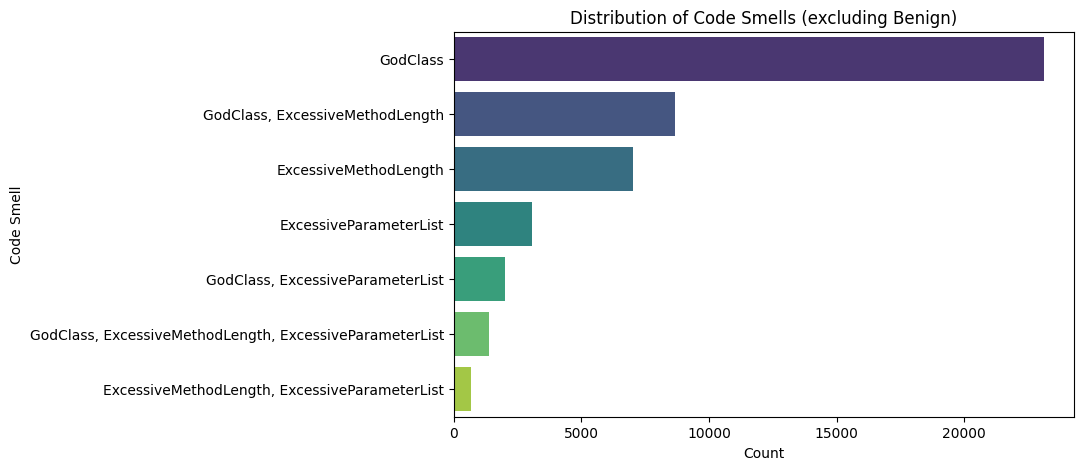

In [ ]:
filtered_df = df[df['CodeSmell'] != 'Benign']

plt.figure(figsize=(8, 5))
sns.countplot(y='CodeSmell', data=filtered_df, order=filtered_df['CodeSmell'].value_counts().index, palette='viridis')
plt.title('Distribution of Code Smells (excluding Benign)')
plt.xlabel('Count')
plt.ylabel('Code Smell')
plt.show()

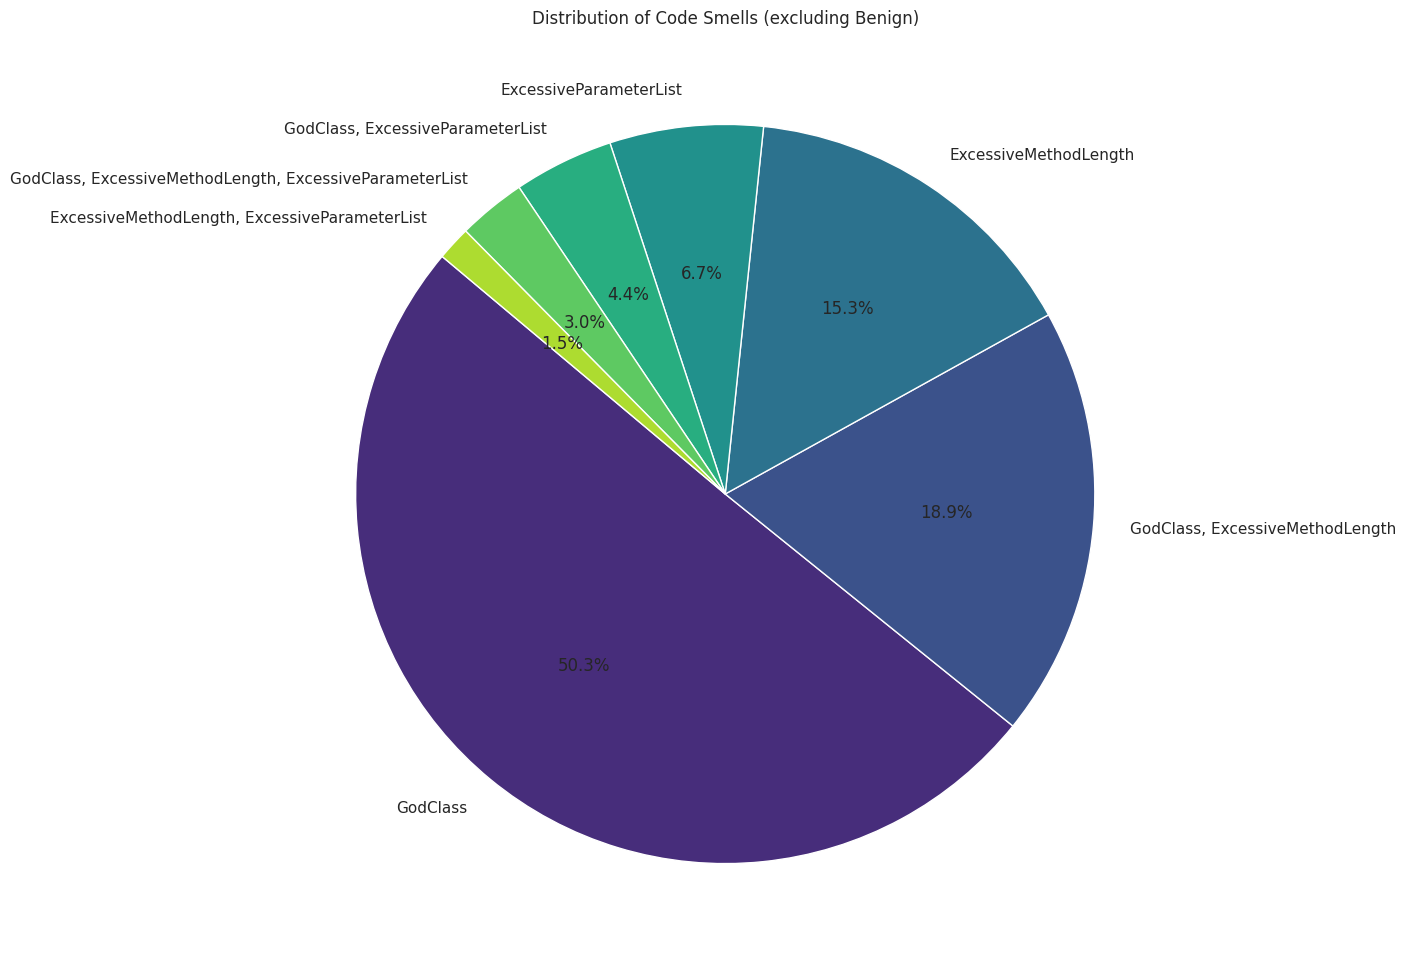

In [ ]:
code_smell_counts = filtered_df['CodeSmell'].value_counts()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 12))
plt.pie(code_smell_counts, labels=code_smell_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(code_smell_counts)))
plt.title('Distribution of Code Smells (excluding Benign)')
plt.show()

In [ ]:
percentage_counts = df['CodeSmell'].value_counts(normalize=True) * 100
percentage_counts = percentage_counts.round(2)
percentage_counts

Benign                                                     75.75
GodClass                                                   12.20
GodClass, ExcessiveMethodLength                             4.57
ExcessiveMethodLength                                       3.71
ExcessiveParameterList                                      1.63
GodClass, ExcessiveParameterList                            1.06
GodClass, ExcessiveMethodLength, ExcessiveParameterList     0.72
ExcessiveMethodLength, ExcessiveParameterList               0.36
Name: CodeSmell, dtype: float64

In [ ]:
rows_to_drop = (df['DataClass'] == 1) & (df['GodClass'] == 0) & (df['ExcessiveMethodLength'] == 0) & (df['ExcessiveParameterList'] == 0)
df = df[~rows_to_drop]

In [ ]:
df['CodeSmell'] = df[['GodClass', 'ExcessiveMethodLength', 'ExcessiveParameterList']].any(axis=1).astype(int)
df['CodeSmell'].value_counts()

0    128212
1     45980
Name: CodeSmell, dtype: int64

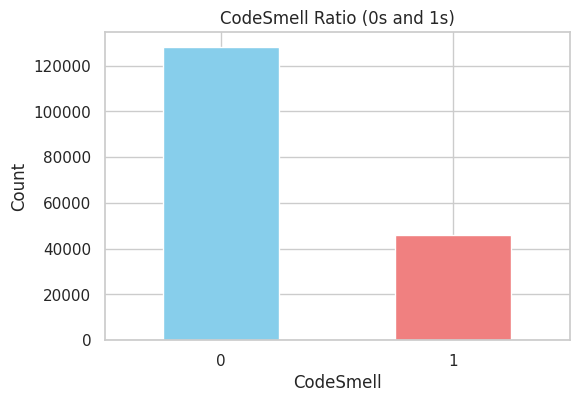

In [ ]:
plt.figure(figsize=(6, 4))
df['CodeSmell'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('CodeSmell Ratio (0s and 1s)')
plt.xlabel('CodeSmell')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

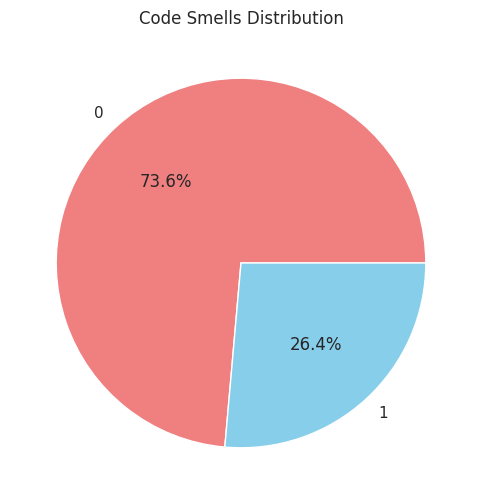

In [ ]:
counts = df['CodeSmell'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Code Smells Distribution')
plt.show()

In [ ]:
df.drop(['GodClass', 'DataClass', 'ExcessiveMethodLength', 'ExcessiveParameterList'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174192 entries, 1 to 190706
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Complexity        174192 non-null  int64  
 1   Coupling          174192 non-null  int64  
 2   Size              174192 non-null  int64  
 3   Lack of Cohesion  174192 non-null  int64  
 4   CBO               174192 non-null  float64
 5   RFC               174192 non-null  float64
 6   SRFC              174192 non-null  float64
 7   DIT               174192 non-null  float64
 8   NOC               174192 non-null  float64
 9   WMC               174192 non-null  float64
 10  LOC               174192 non-null  float64
 11  CMLOC             174192 non-null  float64
 12  NOF               174192 non-null  float64
 13  NOSF              174192 non-null  float64
 14  NOM               174192 non-null  float64
 15  NOSM              174192 non-null  float64
 16  NORM              17

In [ ]:
df = pd.concat([df, ps_df], axis=1)
df.dropna(inplace=True)
df.shape

(174192, 29)

In [ ]:
y = df['CodeSmell']
df.drop('CodeSmell', axis=1, inplace=True)
df['CodeSmell'] = y

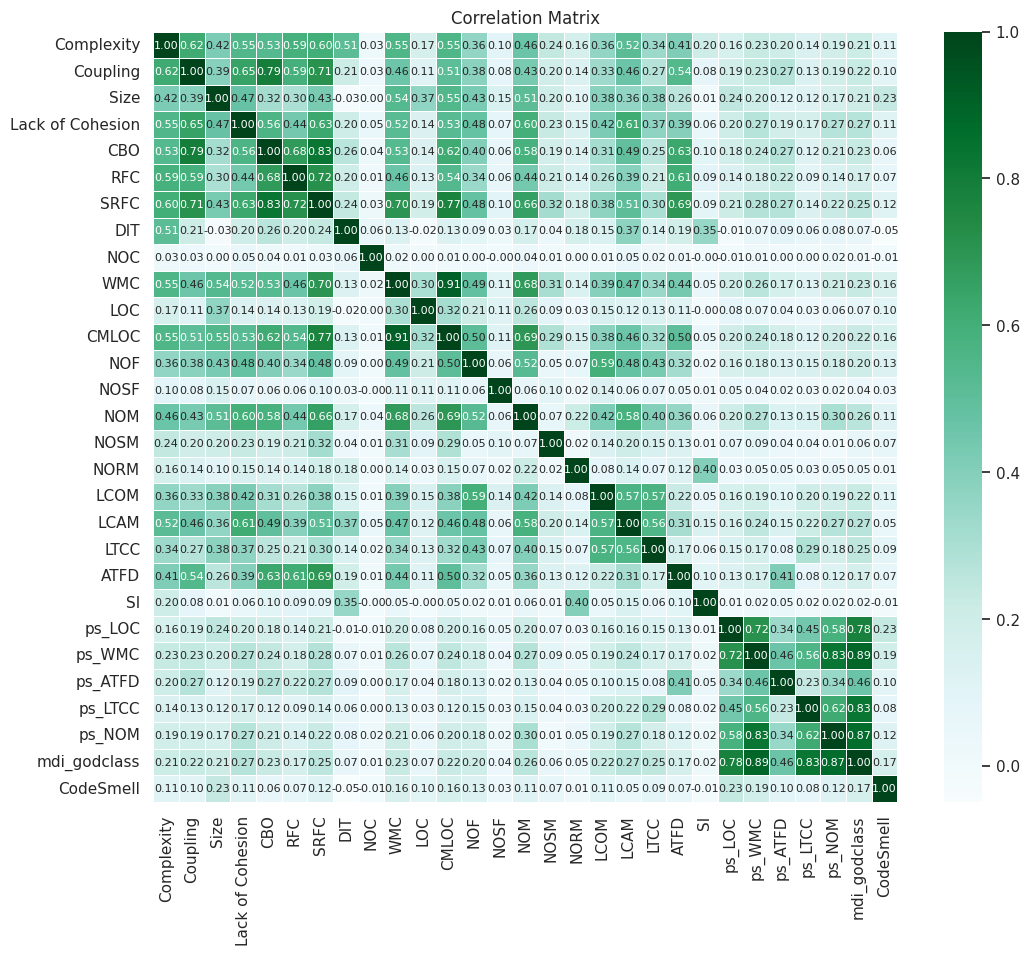

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='BuGn', fmt='.2f', linewidths=.5, annot_kws={'size': 8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
num_cols = df.select_dtypes(include='number').columns[:-1].tolist()
len(num_cols)

28

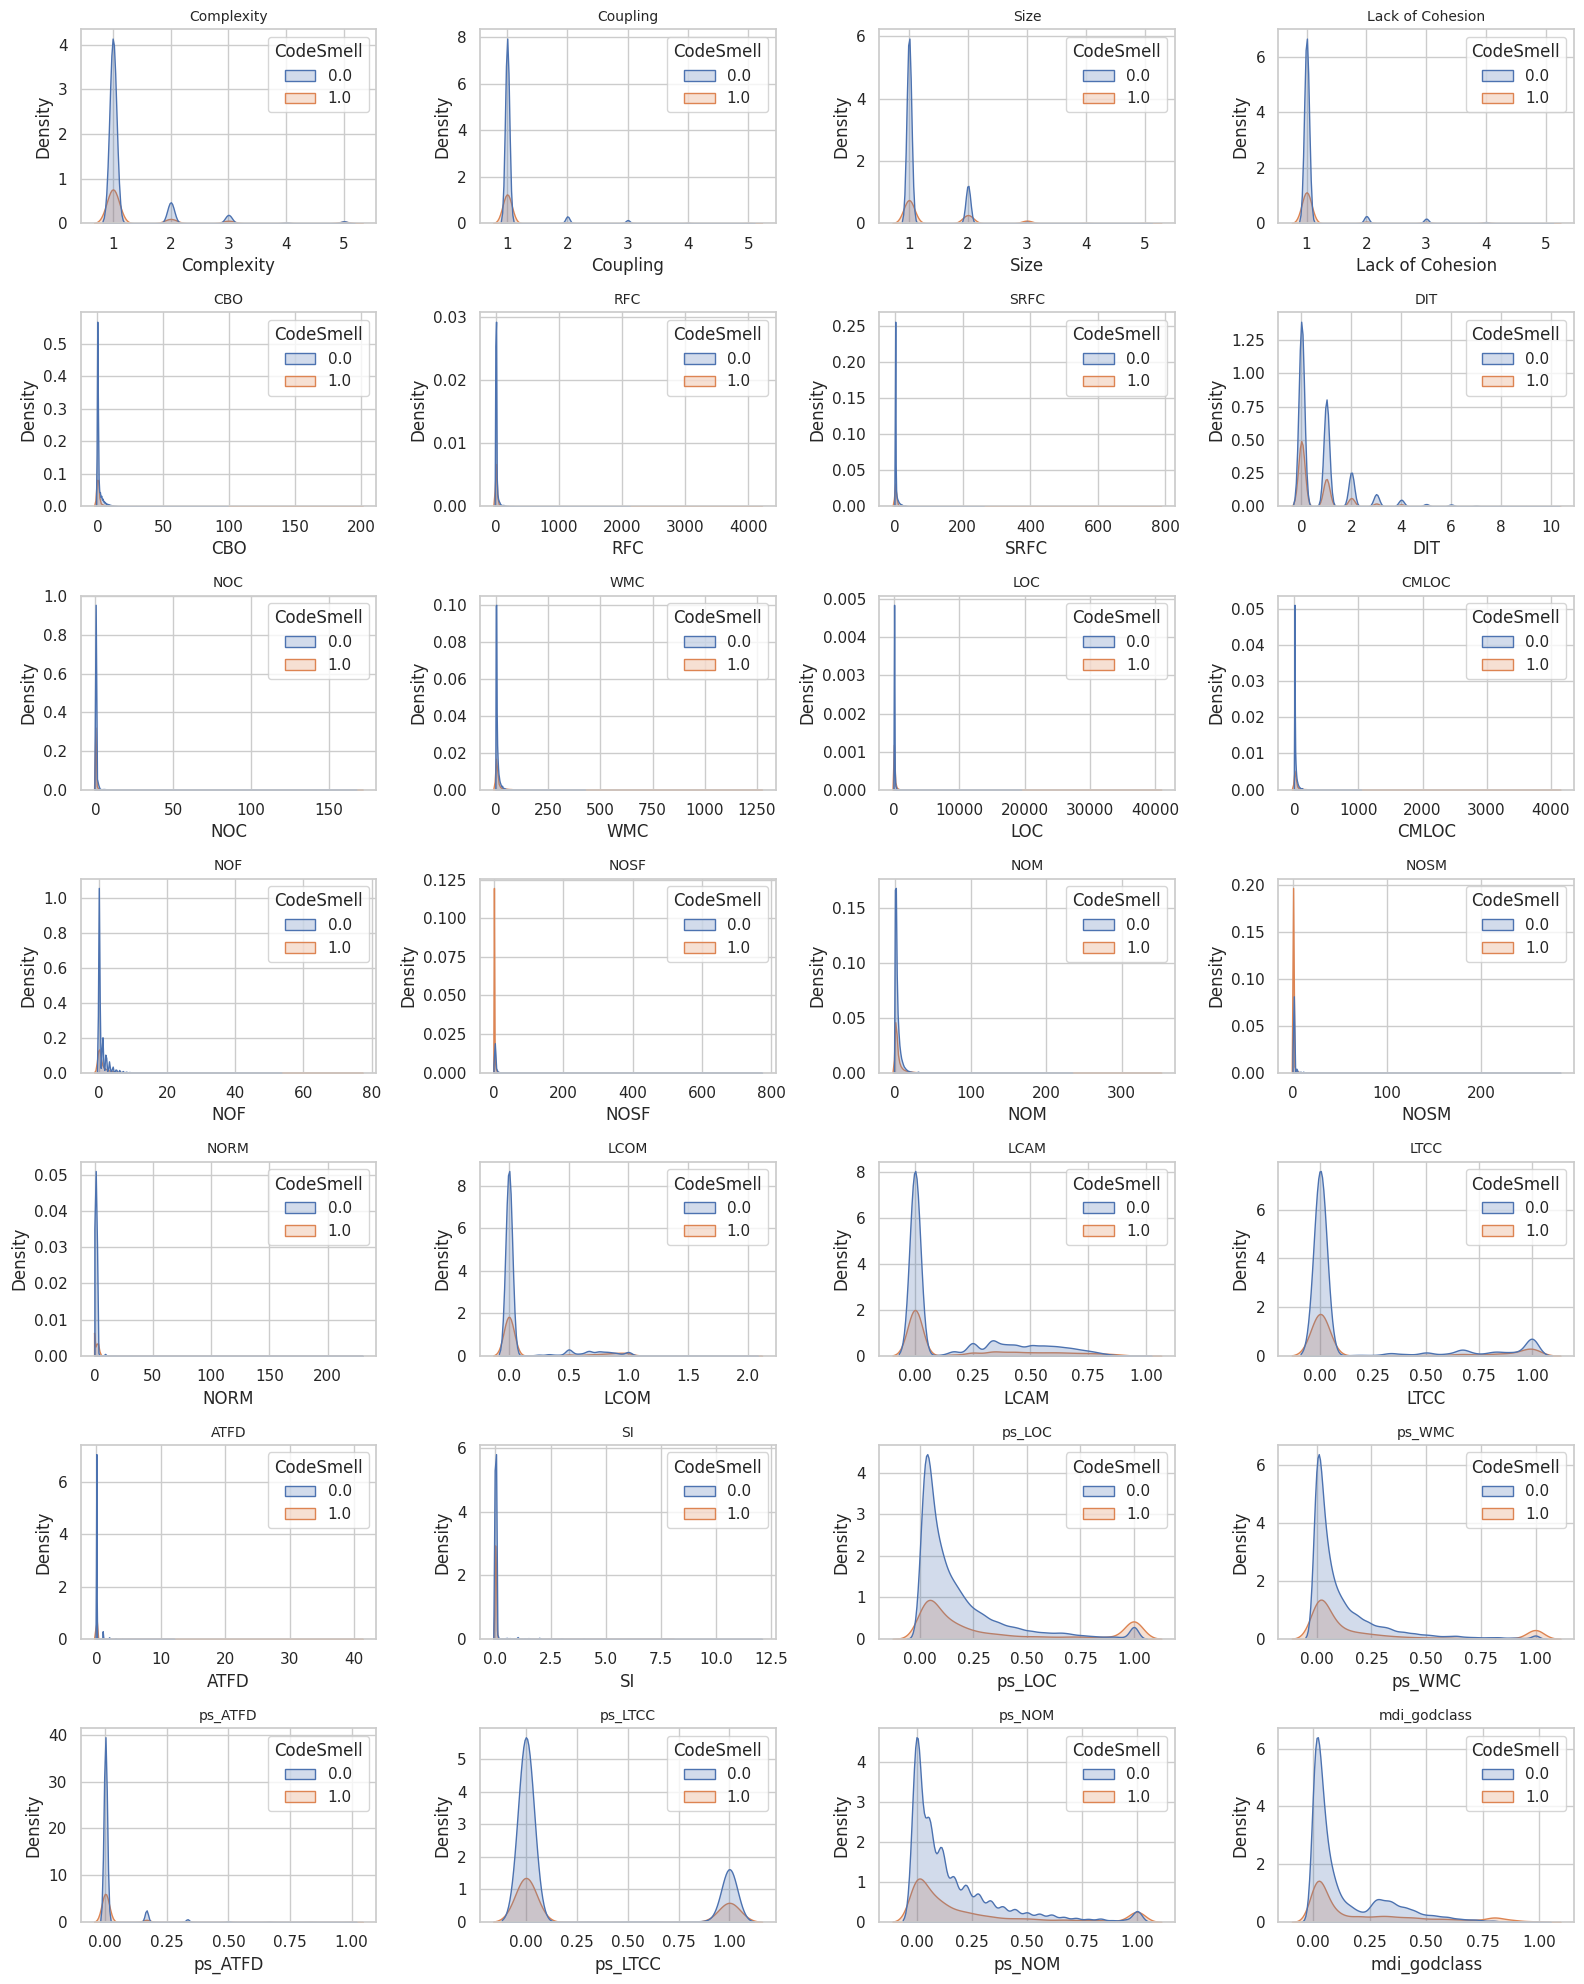

In [ ]:
plt.figure(figsize=(16, 20))

for ax, col in enumerate(num_cols):
    plt.subplot(7, 4, ax + 1)
    plt.title(col, fontsize=10)
    sns.kdeplot(x=df[col], fill=True, hue=df['CodeSmell'])

plt.tight_layout()
plt.show()

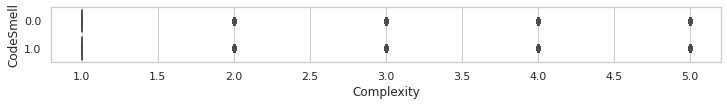

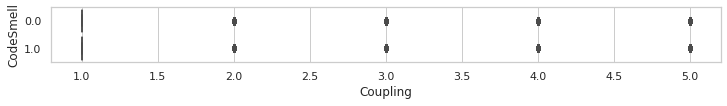

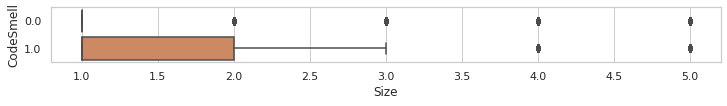

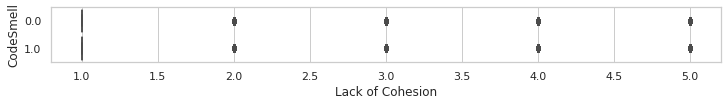

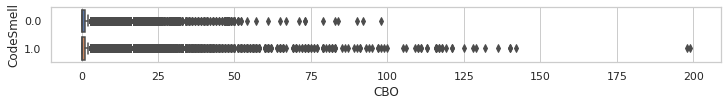

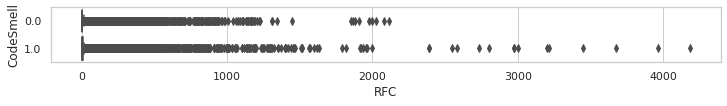

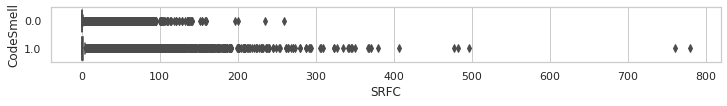

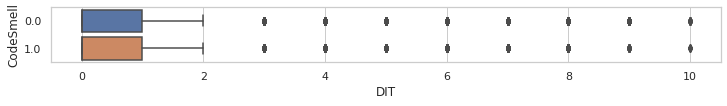

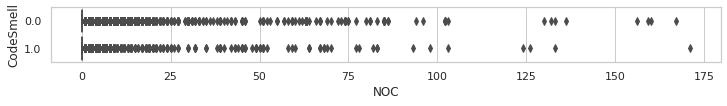

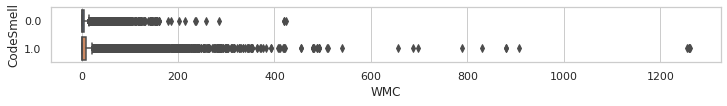

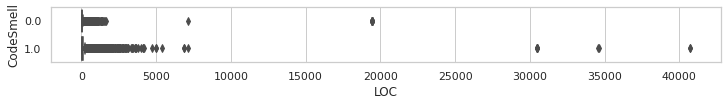

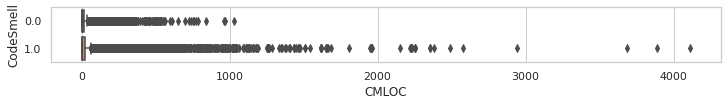

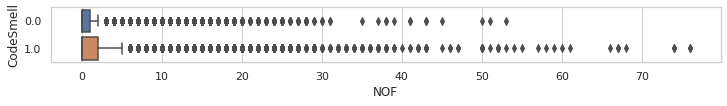

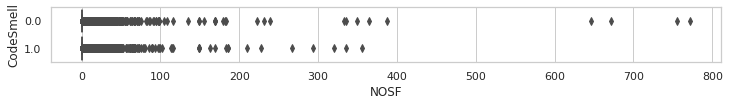

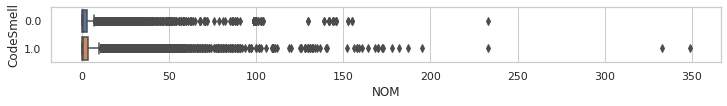

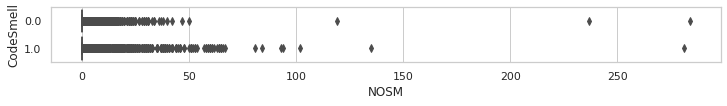

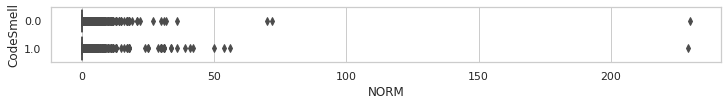

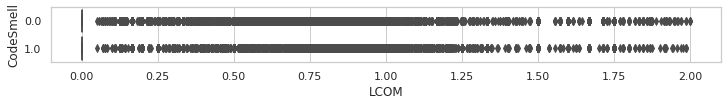

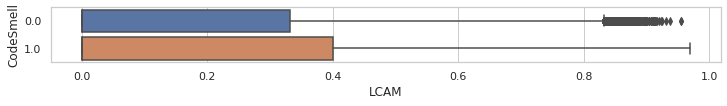

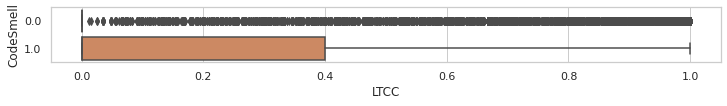

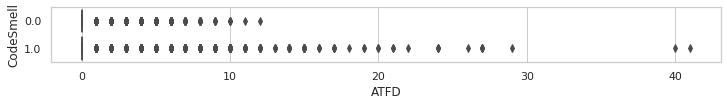

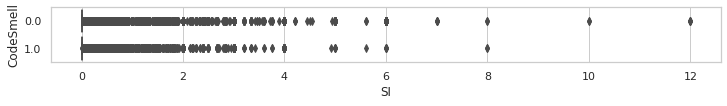

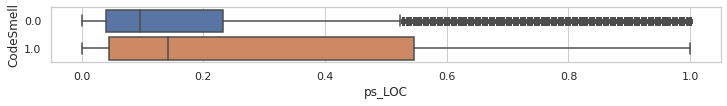

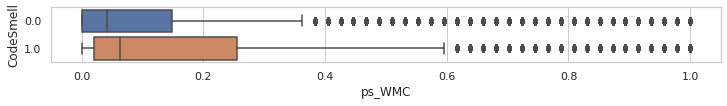

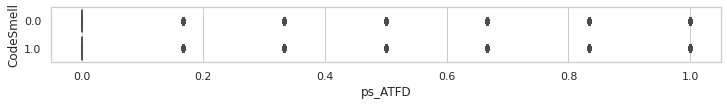

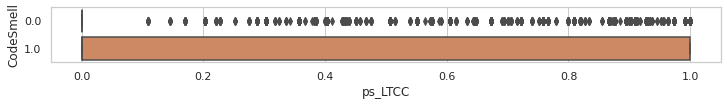

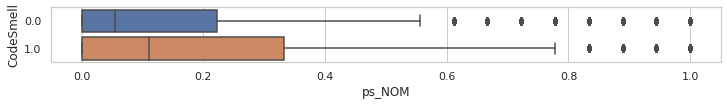

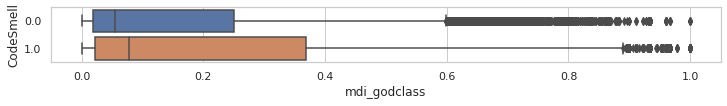

In [ ]:
for ax, col in enumerate(num_cols):
    plt.figure(figsize=(12, 1), dpi=72)
    sns.boxplot(x = df[col], y=df['CodeSmell'], data = df, orient='h')
    plt.show()

In [ ]:
def outlier_thresholds(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

def check_outlier(data, col_name):
    lower_limit, upper_limit = outlier_thresholds(data, col_name)

    outliers = data[(data[col_name] > upper_limit) | (data[col_name] < lower_limit)]
    percentage_outliers = (len(outliers) / len(data)) * 100

    return outliers.any(axis=None), round(percentage_outliers, 2)

In [ ]:
outlier_results = pd.DataFrame(columns=['Column', 'Has_Outliers'])

for col in num_cols:
    has_outliers, percentage = check_outlier(df, col)
    outlier_results = outlier_results.append({'Column': col, 'Has_Outliers': has_outliers, 'Percentage': percentage}, ignore_index=True)

outlier_results = outlier_results[outlier_results['Has_Outliers'] == True]
outlier_results = outlier_results[outlier_results['Percentage'] > 1]
outlier_results = outlier_results.sort_values(by='Percentage')
outlier_results

Column Has_Outliers  Percentage
27      mdi_godclass         True        3.98
21                SI         True        4.52
16              NORM         True        5.16
20              ATFD         True        6.10
1           Coupling         True        6.57
14               NOM         True        6.73
7                DIT         True        6.90
3   Lack of Cohesion         True        8.20
15              NOSM         True        8.43
26            ps_NOM         True        8.89
24           ps_ATFD         True        8.95
8                NOC         True        9.55
23            ps_WMC         True       10.20
22            ps_LOC         True       10.82
9                WMC         True       10.83
10               LOC         True       11.14
11             CMLOC         True       11.26
12               NOF         True       12.94
5                RFC         True       14.58
6               SRFC         True       15.43
4                CBO         True       16.31
0         Complexity         True       16.67
13              NOSF         True       18.09
17              LCOM         True       18.82
19              LTCC         True       21.77
2               Size         True       21.93

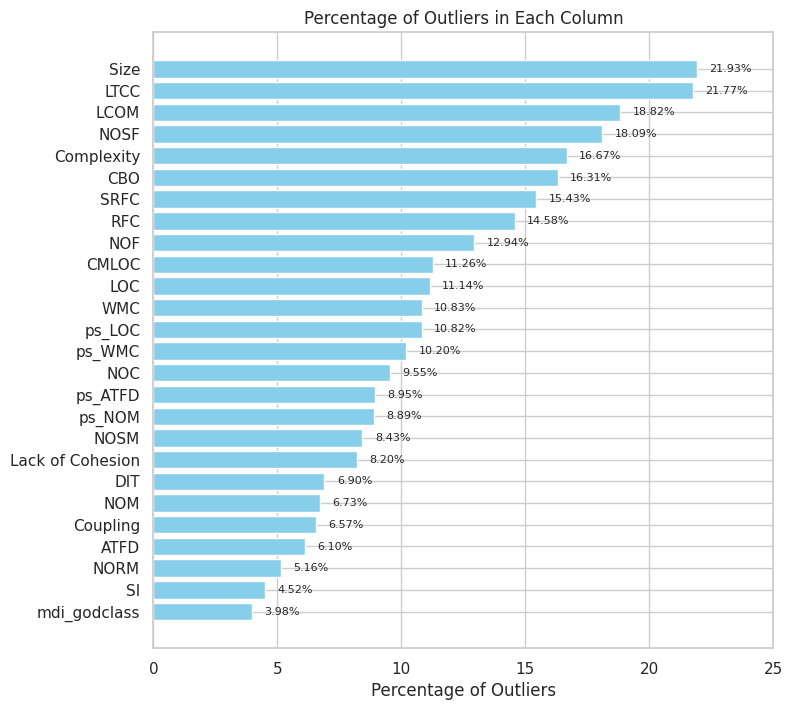

In [ ]:
plt.figure(figsize=(8, 8))
bars = plt.barh(outlier_results['Column'], outlier_results['Percentage'], color='skyblue')
plt.xlabel('Percentage of Outliers')
plt.title('Percentage of Outliers in Each Column')
plt.xticks(np.arange(0, 26, 5))

for bar, label in zip(bars, outlier_results['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{label:.2f}%', va='center', fontsize=8)

plt.show()

In [ ]:
bkp_df = df.copy()

In [ ]:
def replace_with_thresholds(data, col):
    lower_limit, upper_limit = outlier_thresholds(data, col)

    data.loc[(data[col] < lower_limit), col] = lower_limit
    data.loc[(data[col] > upper_limit), col] = upper_limit

for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=True, cmap='BuGn', fmt='.2f', linewidths=.5, annot_kws={'size': 8})
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
df['CodeSmell'].value_counts()

0.0    128212
1.0     45980
Name: CodeSmell, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('CodeSmell', axis=1)
y = df['CodeSmell']

smote = SMOTE(random_state=42)

X_upsampled, y_upsampled = smote.fit_resample(X, y)
print(len(X_upsampled))

X_upsampled = pd.DataFrame(data=X_upsampled, columns=df.columns[:-1])
X_upsampled.shape

256424


(256424, 28)

In [ ]:
y_upsampled.value_counts()

1.0    128212
0.0    128212
Name: CodeSmell, dtype: int64

In [ ]:
y = y_upsampled.copy()

#**Feature Selection**


Correlation analysis is crucial for feature selection, revealing relationships within data. Optimal features exhibit low inter-correlation but a significant link with the target variable, preventing redundancy. Employing a coefficient threshold of 0.1 or higher with "Codesmell" guides the selection of informative features, refined further through strategies like thresholding or machine learning methods.

###Correlation based

In [ ]:
correlation_matrix = df.corr()

corr_columns = correlation_matrix['CodeSmell'][correlation_matrix['CodeSmell'] >= 0.1].index.tolist()[:-1]

corr_columns

['Complexity',
 'Size',
 'Lack of Cohesion',
 'SRFC',
 'WMC',
 'LOC',
 'CMLOC',
 'NOF',
 'NOM',
 'LCOM',
 'ps_LOC',
 'ps_WMC',
 'ps_NOM',
 'mdi_godclass']

In [ ]:
X_corr = X_upsampled[corr_columns]
X_corr.head()

Complexity  Size  Lack of Cohesion  SRFC    WMC    LOC  CMLOC  NOF  NOM  \
0         1.0   1.0               1.0   0.0    0.0    5.0    0.0  0.0  0.0   
1         1.0   1.0               1.0   0.0    0.0    5.0    0.0  0.0  0.0   
2         1.0   1.0               1.0  12.0    9.0   30.0   29.0  0.0  1.0   
3         4.0   2.0               3.0  44.0  112.0  227.0  226.0  0.0  1.0   
4         2.0   2.0               3.0  19.0   42.0   74.0   73.0  0.0  1.0   

   LCOM    ps_LOC    ps_WMC    ps_NOM  mdi_godclass  
0   0.0  0.005682  0.000000  0.000000      0.001136  
1   0.0  0.034091  0.042553  0.111111      0.037551  
2   0.0  0.250000  0.000000  0.000000      0.050000  
3   0.0  0.011364  0.021277  0.055556      0.017639  
4   0.0  0.017045  0.000000  0.000000      0.003409

###SelectFromModel


Utilizing models like random forests enables effective feature selection by evaluating each feature's impact on machine learning performance. Post-training, higher coefficients signify greater relevance guiding the choice of essential elements for a refined dataset.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
selector = SelectFromModel(model)
X_selected = selector.fit_transform(X_upsampled, y_upsampled)

In [ ]:
selected_feat = X_upsampled.columns[selector.get_support()]
print(selected_feat)

Index(['LOC', 'CMLOC', 'ps_LOC', 'ps_WMC', 'ps_LTCC', 'ps_NOM',
       'mdi_godclass'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_sfm = X_upsampled[selected_feat]
X_sfm = scaler.fit_transform(X_sfm)
X_sfm = pd.DataFrame(data=X_sfm, columns=selected_feat)

In [ ]:
X_sfm.head()

LOC  CMLOC    ps_LOC    ps_WMC  ps_LTCC  ps_NOM  mdi_godclass
0 -0.314815  -0.15 -0.408955 -0.319379      0.0    -0.4     -0.245094
1 -0.314815  -0.15 -0.306717 -0.077194      0.0     0.0     -0.112178
2  0.148148   1.30  0.470299 -0.319379      0.0    -0.4     -0.066738
3  3.796296  11.15 -0.388508 -0.198287      0.0    -0.2     -0.184858
4  0.962963   3.50 -0.368060 -0.319379      0.0    -0.4     -0.236799

###RFE


Recursive Feature Elimination (RFE) stands out as a popular and effective feature selection method, systematically identifying the most informative features for a given model. By iteratively training models on subsets of features and eliminating the least significant ones, RFE minimizes overfitting and enhances model generalization. Its recursive nature ensures a thorough evaluation of feature relevance, providing a prioritized list based on their impact on model performance. While offering flexibility across diverse datasets and research goals, RFE's interpretability improves model understanding by revealing fundamental connections between features and the target variable, although researchers should consider its susceptibility to noise and unnecessary characteristics.

In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

xgb_model = XGBClassifier(random_state=42)

rfe = RFE(xgb_model, n_features_to_select=15)

X_rfe_XGB = rfe.fit_transform(X_upsampled, y_upsampled)

cols = X_upsampled.columns[rfe.get_support()]
X_rfe_xgb = X_upsampled[cols]
X_rfe_xgb.head()

Complexity  Size  Lack of Cohesion  CBO  DIT  NOC    WMC    LOC  NOF  NOSF  \
0         1.0   1.0               1.0  0.0  1.0  0.0    0.0    5.0  0.0   0.0   
1         1.0   1.0               1.0  0.0  1.0  0.0    0.0    5.0  0.0   0.0   
2         1.0   1.0               1.0  3.0  1.0  0.0    9.0   30.0  0.0   0.0   
3         4.0   2.0               3.0  2.0  1.0  0.0  112.0  227.0  0.0   0.0   
4         2.0   2.0               3.0  1.0  1.0  0.0   42.0   74.0  0.0   0.0   

     ps_LOC    ps_WMC  ps_ATFD  ps_LTCC    ps_NOM  
0  0.005682  0.000000      0.0      0.0  0.000000  
1  0.034091  0.042553      0.0      0.0  0.111111  
2  0.250000  0.000000      0.0      0.0  0.000000  
3  0.011364  0.021277      0.0      0.0  0.055556  
4  0.017045  0.000000      0.0      0.0  0.000000

#**Model Training**

### Helper Functions

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

def train_models(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    bagging = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators = 100,
        max_samples = 0.8,
        oob_score = True,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    bagging_pred = bagging.predict(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)

    return rf_pred, bagging_pred, knn_pred, xgb_pred

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def plot_perf(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, suffix):
    models = ['Random Forest', 'Bagging Classifier', 'KNN', 'XGBoost']
    preds = [rf_pred, bagging_pred, knn_pred, xgb_pred]

    scores = {
        'Precision': [precision_score(y_test, pred, average='weighted') for pred in preds],
        'Recall': [recall_score(y_test, pred, average='weighted')for pred in preds],
        'F1-Score': [f1_score(y_test, pred, average='weighted') for pred in preds],
        'Accuracy':[accuracy_score(y_test, pred) for pred in preds]
    }

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
    fig.suptitle('Model Performance Comparison' + suffix, fontsize=12)

    for i, (metric, vals) in enumerate(scores.items()):
        x, y = i // 2, i % 2
        plot = sns.barplot(x=vals, y=models, ax=axes[x, y], palette='viridis')
        axes[x, y].set_title(metric)
        axes[x, y].set_xticks(np.arange(0, 1.1, 0.2))
        for index, value in enumerate(vals):
            plot.text(value, index, f'{value:.3f}', ha='left', va='center', color='black')

    plt.tight_layout(rect=[0, 0.03, 1, 1])
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, rf_pred, bagging_pred, knn_pred, xgb_pred, suffix, color):
    models_preds = {
        'Random Forest': rf_pred,
        'Bagging Classifier': bagging_pred,
        'KNN': knn_pred,
        'XGBoost': xgb_pred
    }

    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle('Confusion Matrix Comparison' + suffix, fontsize=14)

    for i, (model_name, y_pred) in enumerate(models_preds.items()):
        ax = axes[i]
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap=color, cbar=False, ax=ax)
        ax.set_title(model_name)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, suffix):
    models_preds = {
        'Random Forest': rf_pred,
        'Bagging Classifier': bagging_pred,
        'KNN': knn_pred,
        'XGBoost': xgb_pred
    }

    colors = ['blue', 'green', 'red', 'purple']

    plt.figure(figsize=(8, 5))
    plt.suptitle('ROC-AUC Curve Comparison' + suffix, fontsize=12)

    for i, (model_name, y_pred) in enumerate(models_preds.items()):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color=colors[i])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, suffix):
    models_preds = {
        'Random Forest': rf_pred,
        'Bagging Classifier': bagging_pred,
        'KNN': knn_pred,
        'XGBoost': xgb_pred
    }

    colors = ['blue', 'green', 'red', 'purple']

    plt.figure(figsize=(8, 5))
    plt.suptitle('Precision-Recall Curve Comparison' + suffix, fontsize=12)

    for i, (model_name, y_pred) in enumerate(models_preds.items()):
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})', color=colors[i])

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()

### Correlation Based Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.2, random_state=42)

rf_pred, bagging_pred, knn_pred, xgb_pred = train_models(X_train, X_test, y_train, y_test)

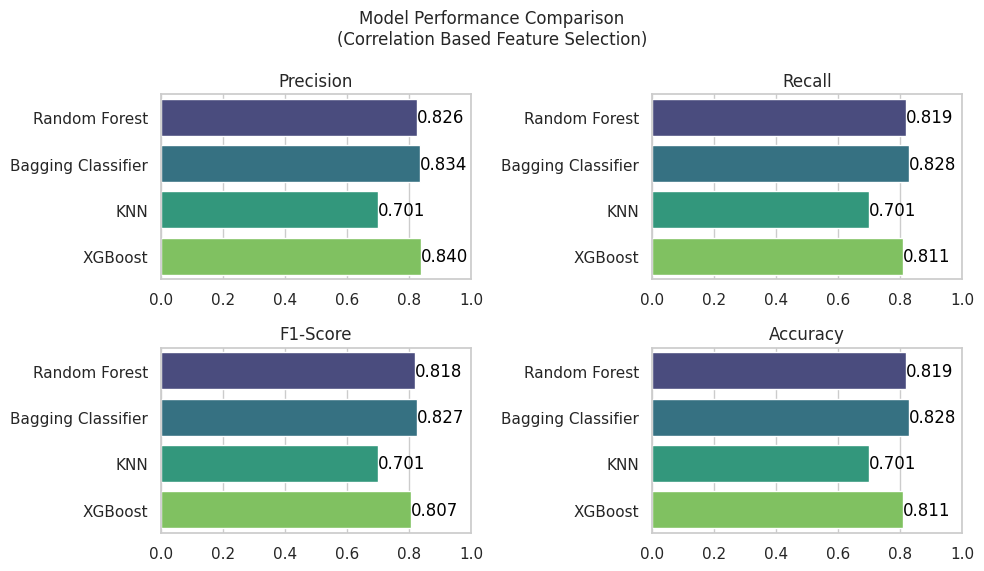

In [ ]:
plot_perf(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, '\n(Correlation Based Feature Selection)')

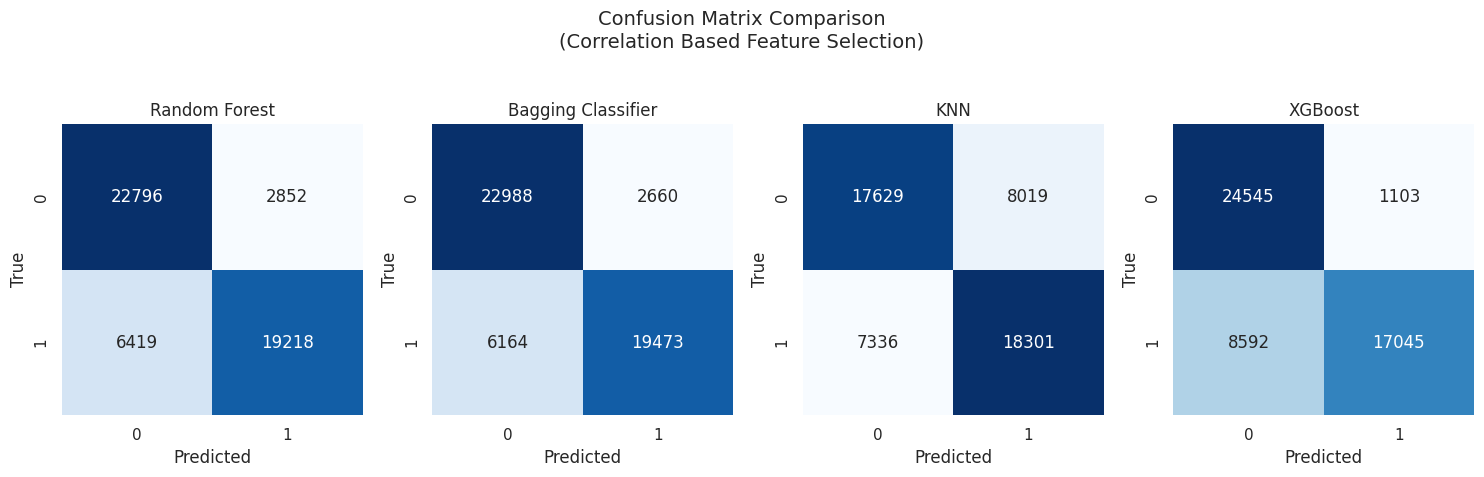

In [ ]:
plot_cm(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, '\n(Correlation Based Feature Selection)', 'Blues')

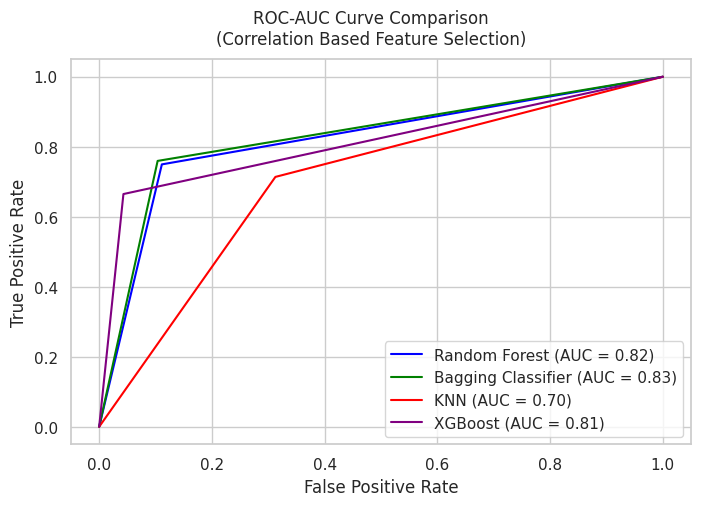

In [ ]:
plot_auc(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, '\n(Correlation Based Feature Selection)')

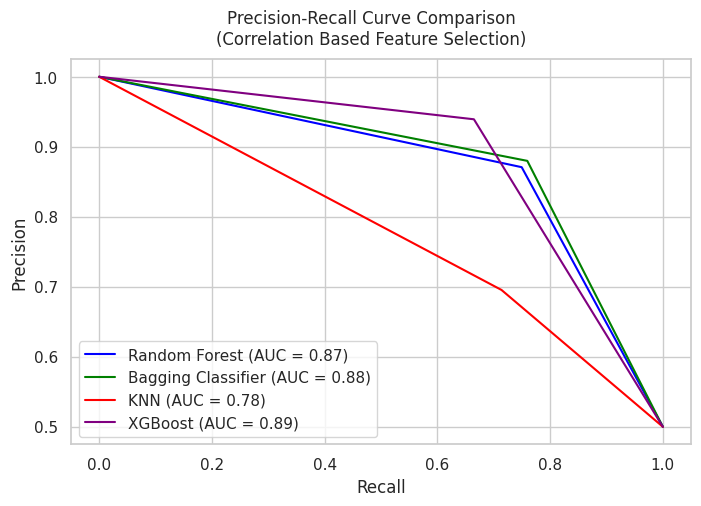

In [ ]:
plot_precision_recall(y_test, rf_pred, bagging_pred, knn_pred, xgb_pred, '\n(Correlation Based Feature Selection)')

### Select From Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=42)

rf_pred2, bagging_pred2, knn_pred2, xgb_pred2 = train_models(X_train, X_test, y_train, y_test)

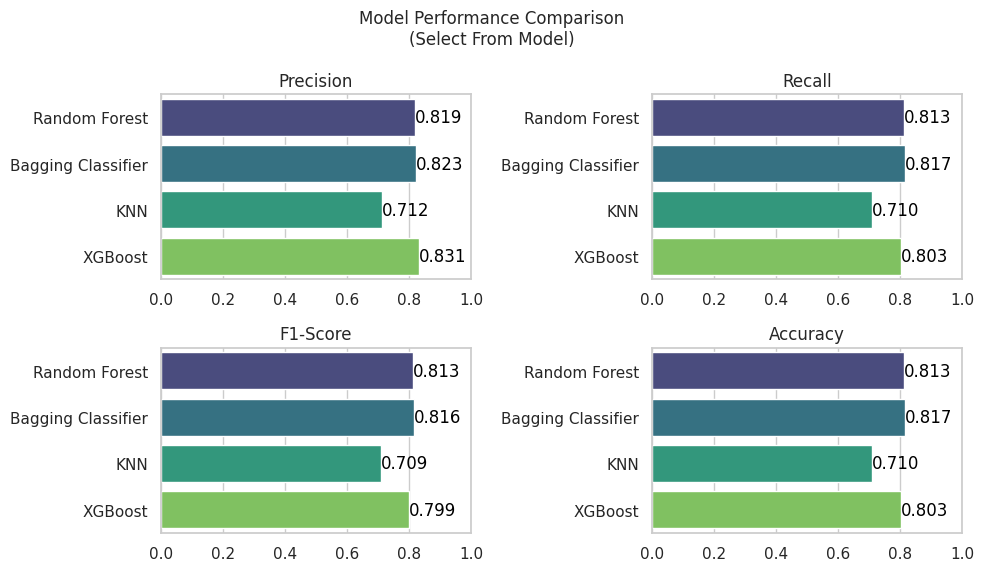

In [ ]:
plot_perf(y_test, rf_pred2, bagging_pred2, knn_pred2, xgb_pred2, '\n(Select From Model)')

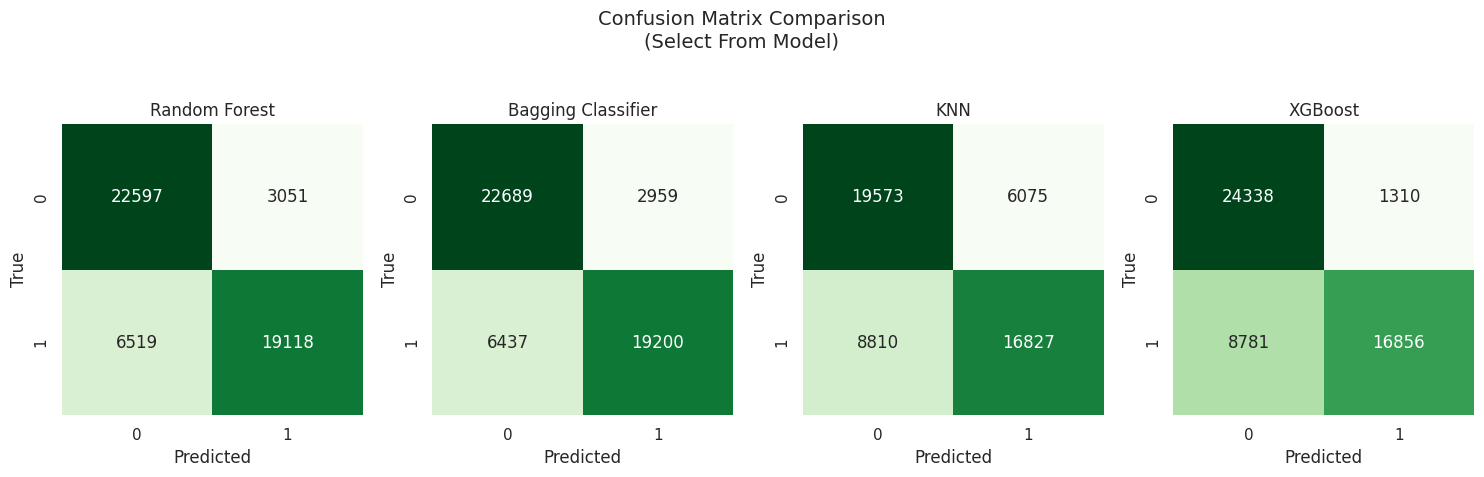

In [ ]:
plot_cm(y_test, rf_pred2, bagging_pred2, knn_pred2, xgb_pred2, '\n(Select From Model)', 'Greens')

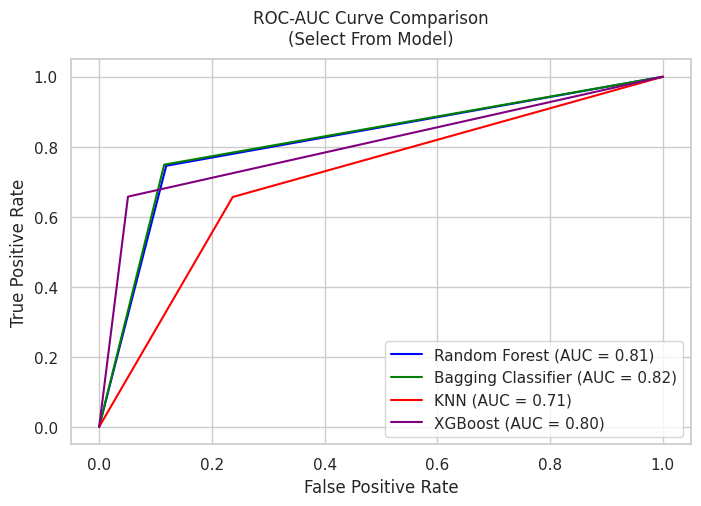

In [ ]:
plot_auc(y_test, rf_pred2, bagging_pred2, knn_pred2, xgb_pred2, '\n(Select From Model)')

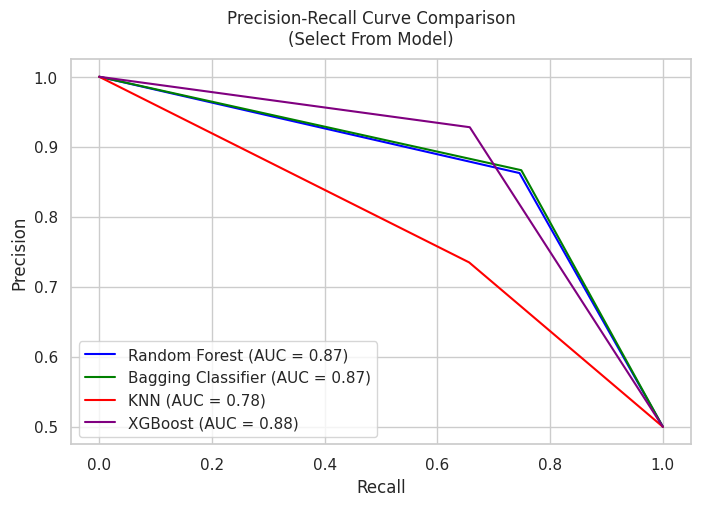

In [ ]:
plot_precision_recall(y_test, rf_pred2, bagging_pred2, knn_pred2, xgb_pred2, '\n(Select From Model)')

### Recursive Feature Elimination

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe_xgb, y, test_size=0.2, random_state=42)

rf_pred3, bagging_pred3, knn_pred3, xgb_pred3 = train_models(X_train, X_test, y_train, y_test)

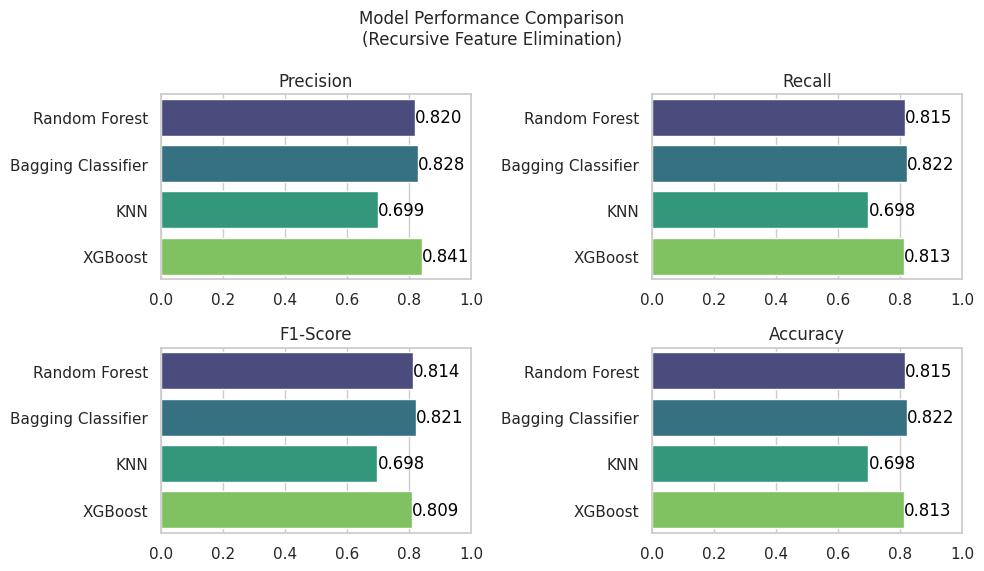

In [ ]:
plot_perf(y_test, rf_pred3, bagging_pred3, knn_pred3, xgb_pred3, '\n(Recursive Feature Elimination)')

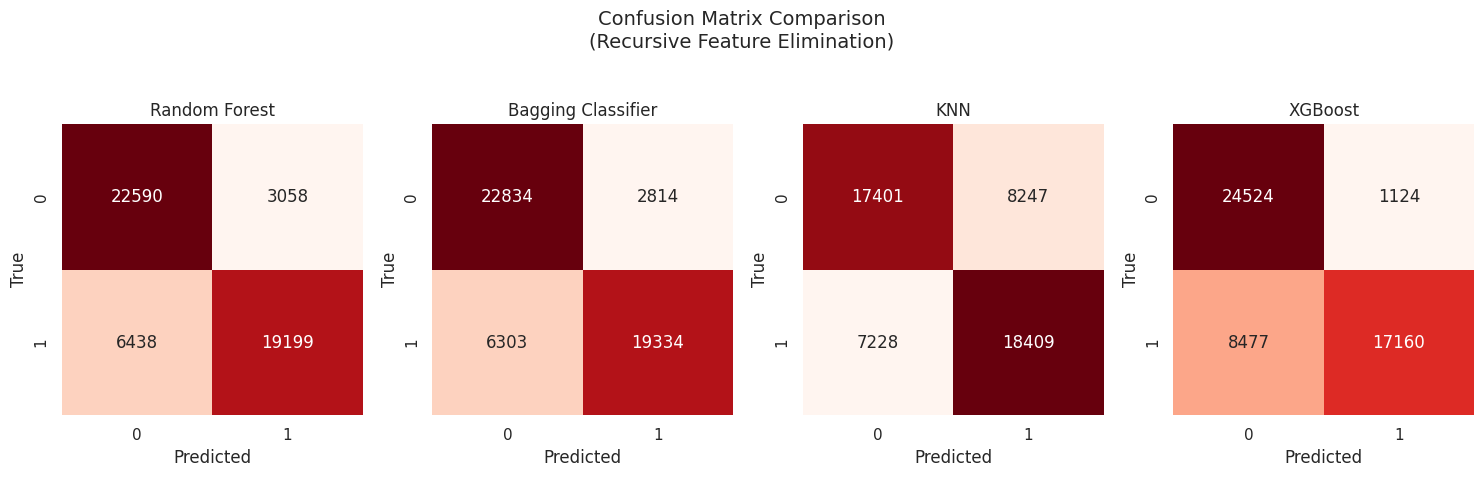

In [ ]:
plot_cm(y_test, rf_pred3, bagging_pred3, knn_pred3, xgb_pred3, '\n(Recursive Feature Elimination)', 'Reds')

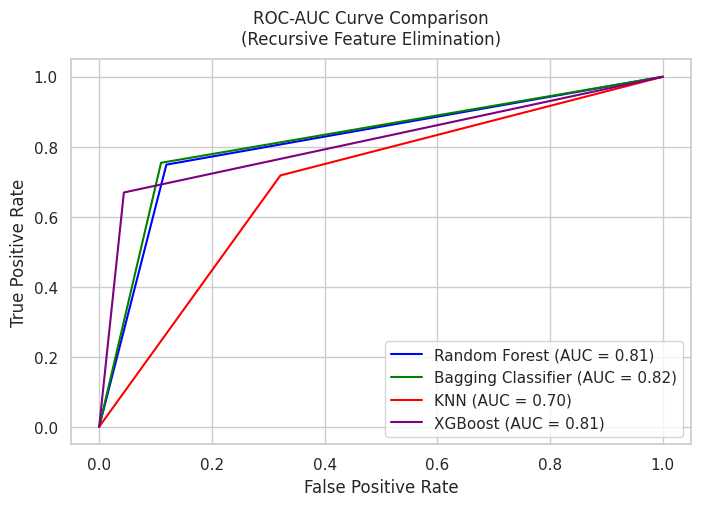

In [ ]:
plot_auc(y_test, rf_pred3, bagging_pred3, knn_pred3, xgb_pred3, '\n(Recursive Feature Elimination)')

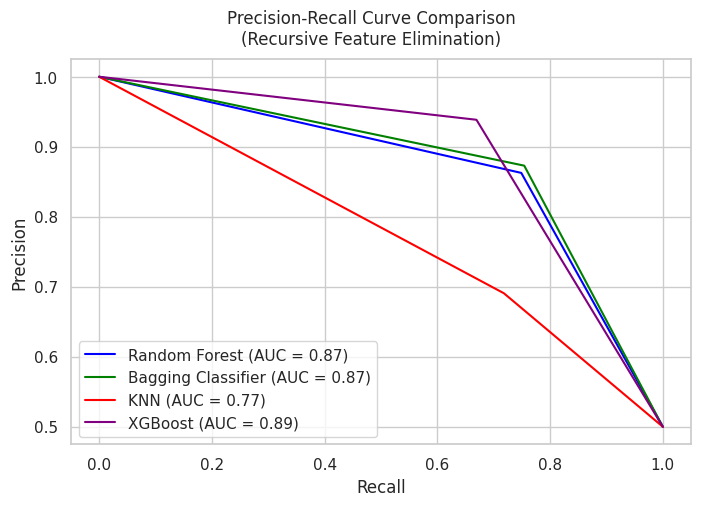

In [ ]:
plot_precision_recall(y_test, rf_pred3, bagging_pred3, knn_pred3, xgb_pred3, '\n(Recursive Feature Elimination)')

#**Visualizations**

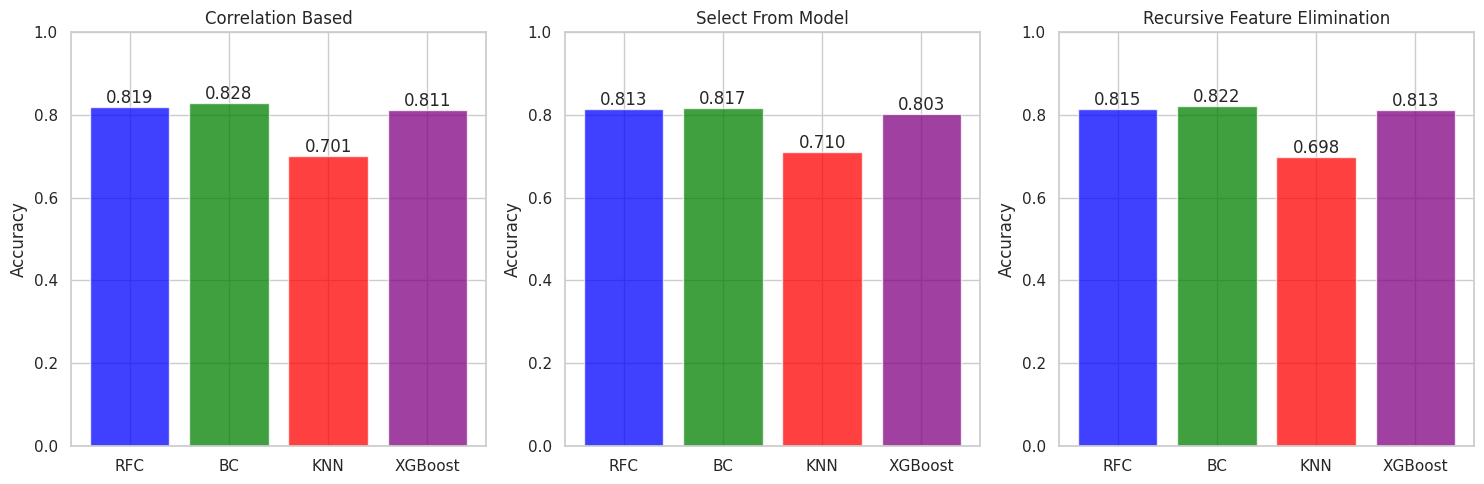

In [ ]:
predictions_list = [
    [rf_pred, bagging_pred, knn_pred, xgb_pred],
    [rf_pred2, bagging_pred2, knn_pred2, xgb_pred2],
    [rf_pred3, bagging_pred3, knn_pred3, xgb_pred3]
]

titles = ['Correlation Based', 'Select From Model', 'Recursive Feature Elimination']

plt.figure(figsize=(15, 5))

for i, predictions in enumerate(predictions_list):
    plt.subplot(1, 3, i + 1)
    plt.title(titles[i])

    models_names = ['RFC', 'BC', 'KNN', 'XGBoost']
    colors = ['blue', 'green', 'red', 'purple']

    for j, y_pred in enumerate(predictions):
        acc = accuracy_score(y_test, y_pred)
        plt.bar(models_names[j], acc, color=colors[j], alpha=0.75)
        plt.text(j, acc, f'{acc:.3f}', ha='center', va='bottom')

    plt.ylabel('Accuracy')
    plt.yticks(np.arange(0, 1.1, 0.2))

plt.tight_layout()
plt.show()

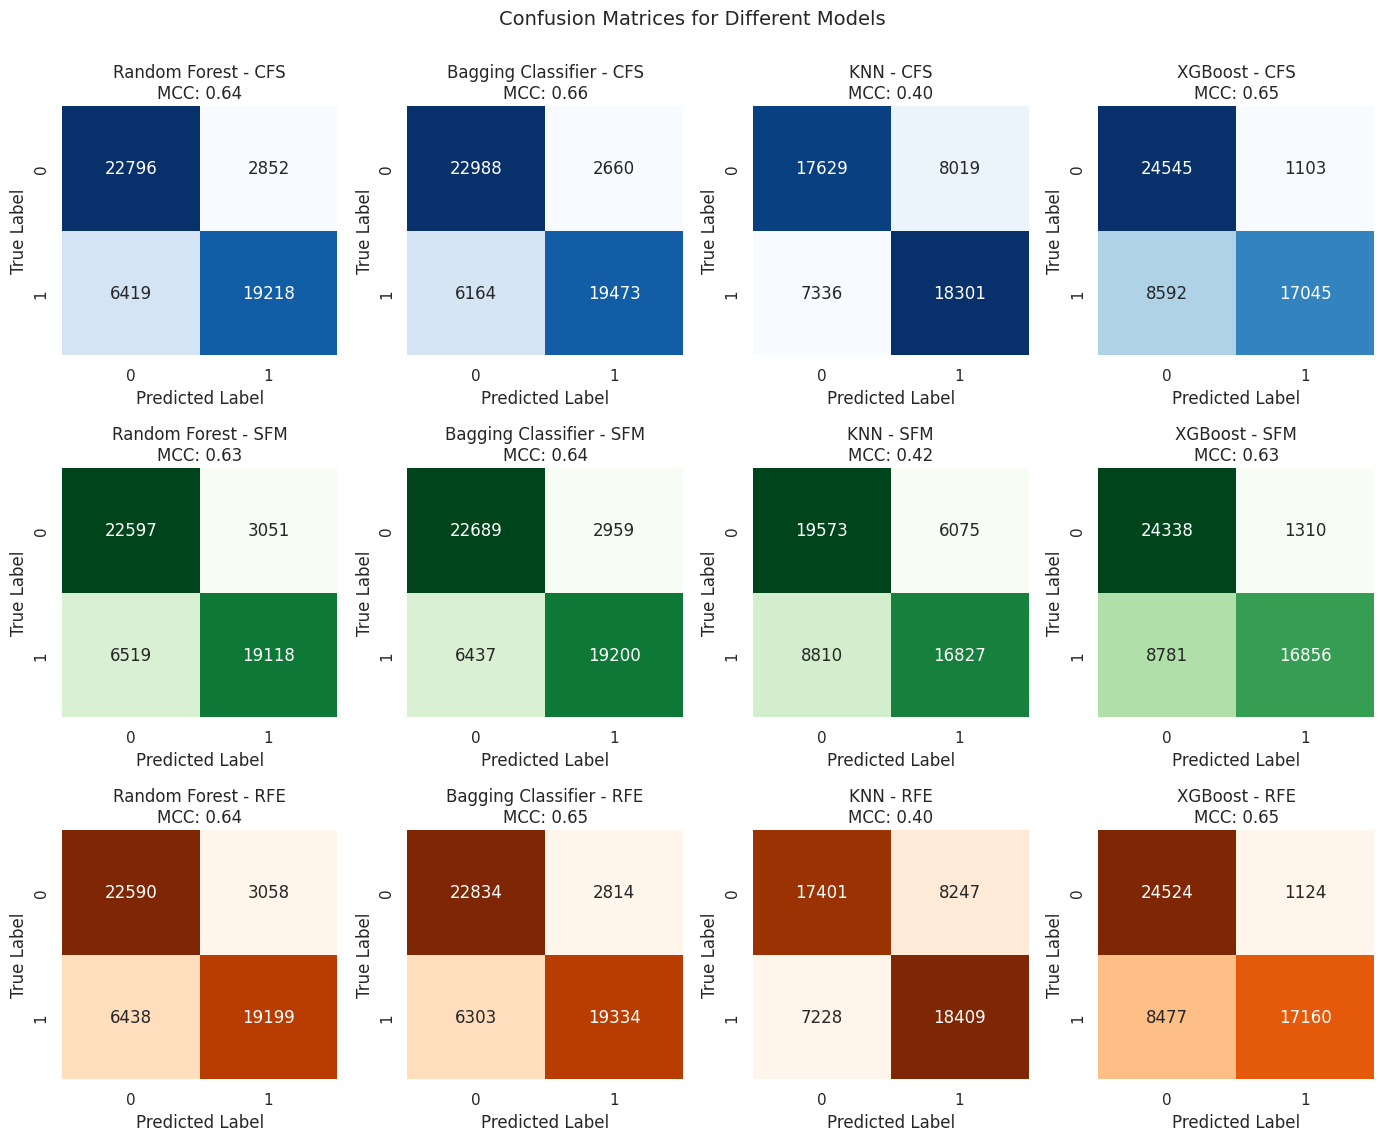

In [ ]:
from sklearn.metrics import matthews_corrcoef

labels = ['CFS', 'SFM', 'RFE']
model_names = ['Random Forest', 'Bagging Classifier', 'KNN', 'XGBoost']

fig, axes = plt.subplots(3, 4, figsize=(14, 12))

cmaps = ['Blues', 'Greens', 'Oranges']

for i, label in enumerate(labels):
    for j, model_name in enumerate(model_names):
        cm = confusion_matrix(y_test, predictions_list[i][j])
        mcc = matthews_corrcoef(y_test, predictions_list[i][j])

        ax = axes[i, j]
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmaps[i], cbar=False, ax=ax)
        ax.set_title(f'{model_name} - {label}\nMCC: {mcc:.2f}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Confusion Matrices for Different Models', fontsize=14)
plt.show()

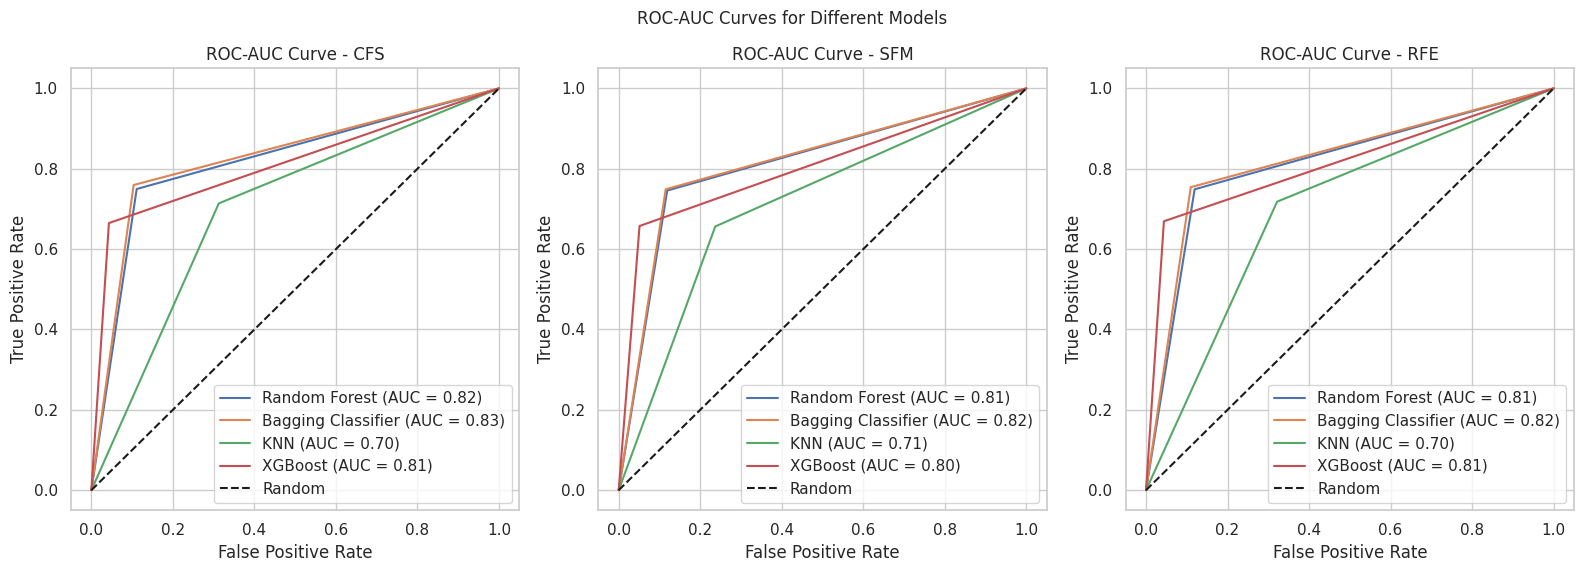

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

labels = ['CFS', 'SFM', 'RFE']
model_names = ['Random Forest', 'Bagging Classifier', 'KNN', 'XGBoost']

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, label in enumerate(labels):
    for j, model_name in enumerate(model_names):
        fpr, tpr, _ = roc_curve(y_test, predictions_list[i][j])
        auc = roc_auc_score(y_test, predictions_list[i][j])

        ax = axes[i]
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', label='Random')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC-AUC Curve - {label}')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('ROC-AUC Curves for Different Models', fontsize=12)
plt.show()

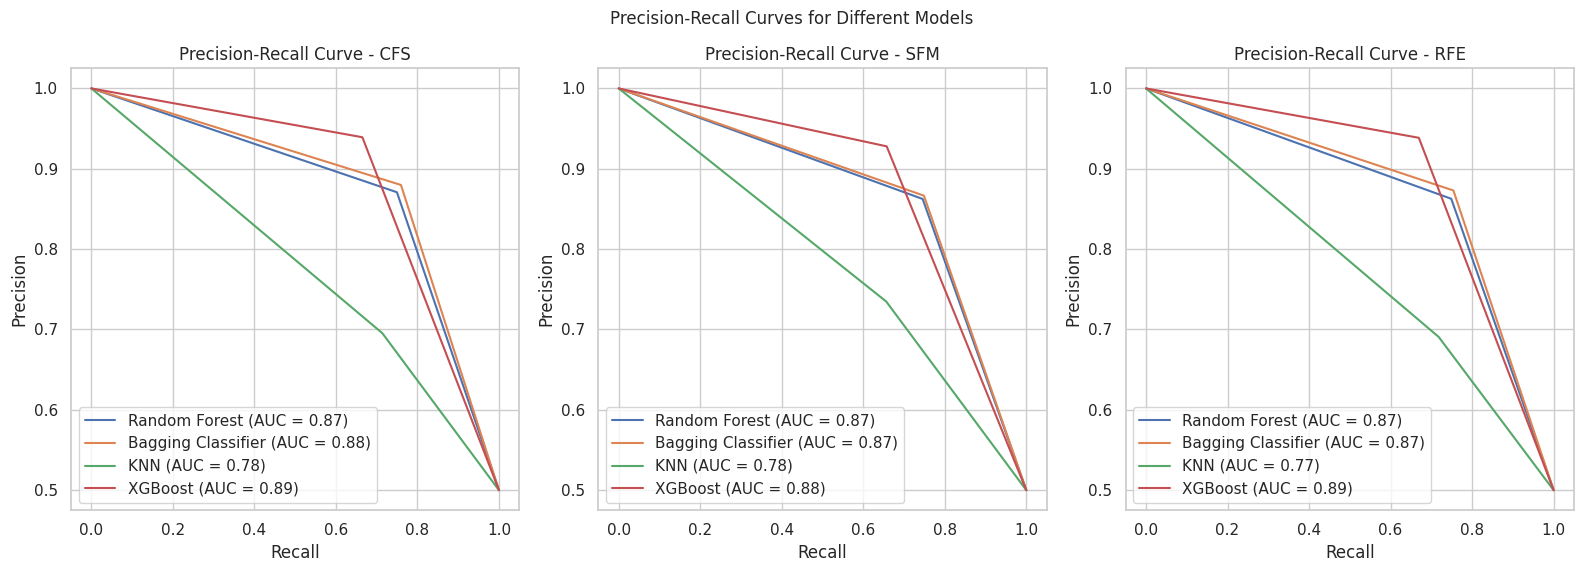

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

labels = ['CFS', 'SFM', 'RFE']
model_names = ['Random Forest', 'Bagging Classifier', 'KNN', 'XGBoost']

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, label in enumerate(labels):
    for j, model_name in enumerate(model_names):
        precision, recall, _ = precision_recall_curve(y_test, predictions_list[i][j])
        pr_auc = auc(recall, precision)

        ax = axes[i]
        ax.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve - {label}')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Precision-Recall Curves for Different Models', fontsize=12)
plt.show()